<a href="https://www.kaggle.com/code/daniyalatta/frompickup-to-drop-off-analyzng-uber-ride-dynamics?scriptVersionId=259285819" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="font-family: 'Segoe UI', Arial, sans-serif; padding: 20px; background-color: #f8f9fa; border-radius: 8px; border: 1px solid #e2e6ea; color: #343a40;">
    <h1 style="color: #007bff; font-weight: 700; border-bottom: 2px solid #007bff; padding-bottom: 10px; margin-bottom: 10px;">
        The Complete Uber Analytics Playbook
    </h1>
    <h3 style="color: #5a6268; font-weight: 500; margin-top: 0;">
        Dive deep into 148K+ Uber ride bookings to uncover insights on ride-sharing patterns, customer behavior, and business performance using advanced data analysis techniques.
    </h3>
    <div style="margin-top: 20px; font-size: 14px;">
        <strong>Author:</strong> Daniyal Atta<br>
        <strong>Date:</strong> August 27, 2025<br>
        <strong>Dataset:</strong> Uber Ride Bookings Dataset (NCR Region)
    </div>
    <hr style="border-top: 1px dashed #ced4da; margin: 25px 0;">
    <div style="font-size: 16px;">
        <h4 style="color: #007bff; margin-top: 0;">Notebook Overview</h4>
        <ol style="padding-left: 0;">
            <li style="margin-bottom: 8px;"><b>Importing Libraries & Environment Setup:</b> Load essential Python libraries for data processing, visualization, and analysis.</li>
            <li style="margin-bottom: 8px;"><b>Data Loading & Wrangling:</b> Load the dataset, handle missing values, and perform feature engineering including temporal extractions (dates, times, days of week) and derived metrics like success rates.</li>
            <li style="margin-bottom: 8px;"><b>Exploratory Data Analysis (EDA):</b> Examine distributions of key features such as ride distances, vehicle types, ratings, and temporal patterns; analyze correlations and booking trends.</li>
            <li style="margin-bottom: 8px;"><b>Advanced Visualizations:</b>
                <ul style="font-family: 'Segoe UI', Arial, sans-serif; color: #343a40; font-size: 14px;">
                    <li><strong>Heatmaps & Bar Charts:</strong> Visualize peak hours, popular vehicle types, and cancellation rates.</li>
                    <li><strong>Geospatial Plots:</strong> Map ride locations and distances if applicable.</li>
                    <li><strong>Trend Lines:</strong> Explore revenue trends over time and customer behavior patterns.</li>
                </ul>
            </li>
            <li style="margin-bottom: 8px;"><b>Deep Analysis:</b> Identify patterns in ride bookings, cancellations, success rates, and factors influencing them.</li>
            <li style="margin-bottom: 8px;"><b>Predictive Modeling:</b> Build machine learning models to predict ride success, revenue, or customer churn using techniques like regression and classification.</li>
            <li style="margin-bottom: 8px;"><b>Business Insights:</b> Derive actionable recommendations on revenue optimization, peak hour management, and vehicle preferences.</li>
            <li style="margin-bottom: 8px;"><b>Evaluation & Metrics:</b> Assess model performance with metrics like accuracy, RMSE, and business-oriented KPIs such as success rate improvements.</li>
            <li style="margin-bottom: 0;"><b>Key Takeaways & Conclusion:</b> Summarize insights, highlight opportunities for growth, and suggest further analyses or real-world applications.</li>
        </ol>
    </div>
</div>

<div style="text-align: center;">
    <img src="https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F14134958%2F2b42c317887b9d5e5b6a218675931da6%2FDasboard.gif?generation=1756235637697216&alt=media" alt="Description of the GIF">
</div>

In [1]:
# Import all the libraries we'll need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Make our plots look nice
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

print("🚀 Libraries loaded successfully!")
print("Ready to dive into the data...")

🚀 Libraries loaded successfully!
Ready to dive into the data...


## 1) Data Loading

✅ Data loaded successfully!
✅ Ready for analysis with 150,000 rides


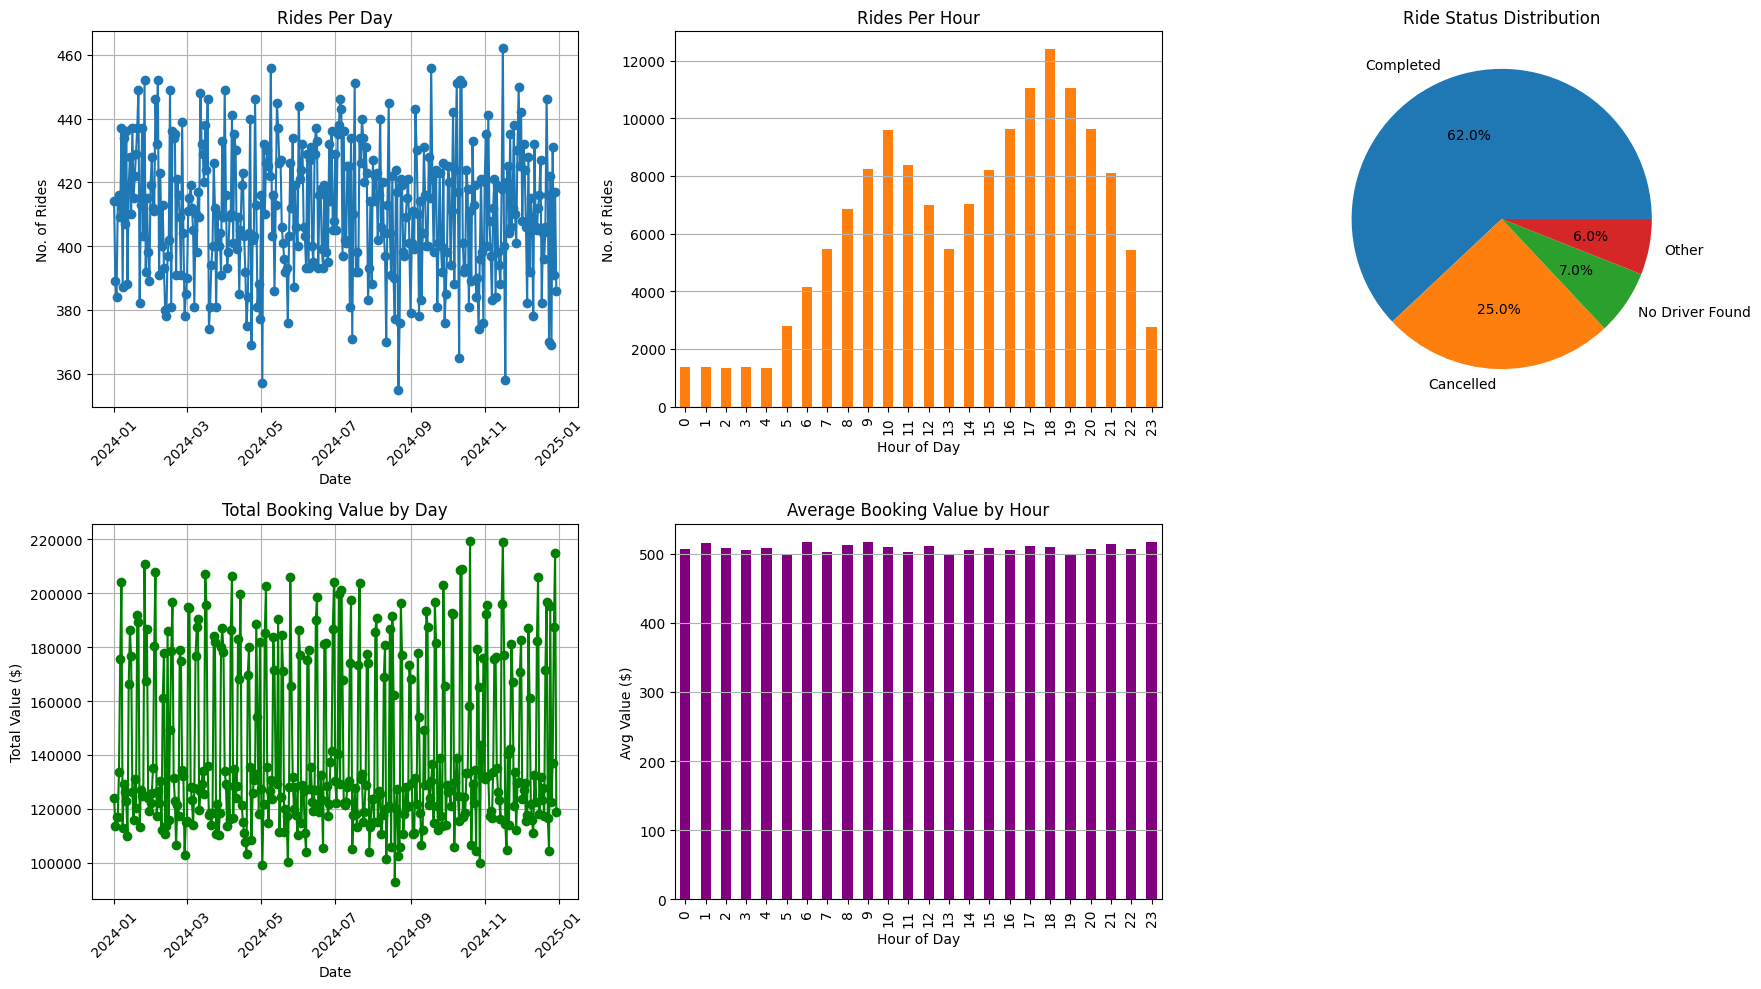

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# 🔹 Data Cleaning & Preparation
# -------------------------------
def clean_and_prepare_data(df):
    """Clean and prepare Uber ride dataset for analysis."""
    try:
        df_clean = df.copy()

        # Convert date & time
        try:
            df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')
            df_clean['DateTime'] = pd.to_datetime(
                df_clean['Date'].astype(str) + ' ' + df_clean['Time'].astype(str),
                errors='coerce'
            )
        except Exception as e:
            print(f"❌ Error in date/time conversion: {e}")
            df_clean['DateTime'] = pd.NaT

        # Extract features
        if 'DateTime' in df_clean.columns:
            df_clean['Hour'] = df_clean['DateTime'].dt.hour
            df_clean['DayOfWeek'] = df_clean['DateTime'].dt.day_name()

        # Categorize booking status
        if 'Booking Status' in df_clean.columns:
            def categorize_status(status):
                status = str(status).lower()
                if 'completed' in status:
                    return 'Completed'
                elif 'cancelled' in status:
                    return 'Cancelled'
                elif 'no driver found' in status:
                    return 'No Driver Found'
                else:
                    return 'Other'
            df_clean['Status_Category'] = df_clean['Booking Status'].apply(categorize_status)

        # Booking Value → numeric
        if 'Booking Value' in df_clean.columns:
            df_clean['Booking Value'] = pd.to_numeric(df_clean['Booking Value'], errors='coerce')

        # Remove rows without DateTime
        df_clean = df_clean.dropna(subset=['DateTime'])
        return df_clean

    except Exception as e:
        print(f"❌ Fatal error in data cleaning: {e}")
        return None

# -------------------------------
# 🔹 Data Loader
# -------------------------------
def load_dataset(file_path):
    """Load dataset from CSV file."""
    try:
        df = pd.read_csv(file_path)
        print("✅ Data loaded successfully!")
        return df
    except Exception as e:
        print(f"❌ Error loading data: {e}")
        return None

# -------------------------------
# 🔹 Analysis + Single Graph
# -------------------------------
def analyze_all(df):
    """Analyze all ride trends on a single sheet (figure)."""
    if df is None or df.empty:
        print("🚫 No data to analyze.")
        return

    df_clean = clean_and_prepare_data(df)
    if df_clean is None or df_clean.empty:
        print("🚫 No data after cleaning.")
        return

    print(f"✅ Ready for analysis with {len(df_clean):,} rides")

    # Create 5 subplots in a grid
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    ax1, ax2, ax3, ax4, ax5 = axes[0,0], axes[0,1], axes[0,2], axes[1,0], axes[1,1]
    fig.delaxes(axes[1,2])  # remove empty subplot

    # 1. Rides per Day
    rides_per_day = df_clean.groupby(df_clean['DateTime'].dt.date).size()
    rides_per_day.plot(kind='line', color='#1f77b4', marker='o', ax=ax1)
    ax1.set_title('Rides Per Day')
    ax1.set_xlabel('Date'); ax1.set_ylabel('No. of Rides')
    ax1.grid(True); ax1.tick_params(axis='x', rotation=45)

    # 2. Rides per Hour
    rides_per_hour = df_clean.groupby('Hour').size()
    rides_per_hour.plot(kind='bar', color='#ff7f0e', ax=ax2)
    ax2.set_title('Rides Per Hour')
    ax2.set_xlabel('Hour of Day'); ax2.set_ylabel('No. of Rides')
    ax2.grid(True, axis='y')

    # 3. Ride Status Distribution
    if 'Status_Category' in df_clean.columns:
        status_counts = df_clean['Status_Category'].value_counts()
        ax3.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%',
                colors=['#1f77b4','#ff7f0e','#2ca02c','#d62728'])
        ax3.set_title('Ride Status Distribution')

    # 4. Total Booking Value by Day
    if 'Booking Value' in df_clean.columns:
        value_by_day = df_clean.groupby(df_clean['DateTime'].dt.date)['Booking Value'].sum()
        value_by_day.plot(kind='line', color='green', marker='o', ax=ax4)
        ax4.set_title('Total Booking Value by Day')
        ax4.set_xlabel('Date'); ax4.set_ylabel('Total Value ($)')
        ax4.grid(True); ax4.tick_params(axis='x', rotation=45)

    # 5. Average Booking Value by Hour
    if 'Booking Value' in df_clean.columns:
        avg_value_by_hour = df_clean.groupby('Hour')['Booking Value'].mean()
        avg_value_by_hour.plot(kind='bar', color='purple', ax=ax5)
        ax5.set_title('Average Booking Value by Hour')
        ax5.set_xlabel('Hour of Day'); ax5.set_ylabel('Avg Value ($)')
        ax5.grid(True, axis='y')

    plt.tight_layout()
    plt.show()

# -------------------------------
# 🔹 Main
# -------------------------------
def main():
    file_path = '/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv'
    df = load_dataset(file_path)
    analyze_all(df)

if __name__ == "__main__":
    main()


✅ Data loaded successfully!
🔧 Data cleaning done!

✅ Ready for analysis with 150,000 rides
📊 Uber Ride & Performance Analytics Report
--------------------------------------------------

🔍 Ride Status Breakdown:
Status_Category
Completed          93000
Cancelled          37500
No Driver Found    10500
Other               9000
Name: count, dtype: int64

📅 Rides by Day of Week:
DayOfWeek
Monday       21644
Tuesday      21391
Wednesday    21413
Thursday     21215
Friday       21397
Saturday     21542
Sunday       21398
dtype: int64

💰 Average Booking Value by Hour:
Hour
0     507.77
1     515.64
2     508.92
3     505.72
4     508.94
5     499.58
6     516.70
7     503.10
8     512.72
9     516.88
10    510.71
11    503.44
12    511.02
13    500.12
14    505.05
15    507.97
16    505.49
17    511.22
18    510.54
19    497.86
20    506.91
21    515.00
22    506.69
23    517.68
Name: Booking Value, dtype: float64

🚗 Driver Ratings Summary:
count    93000.00
mean         4.23
std          0.4

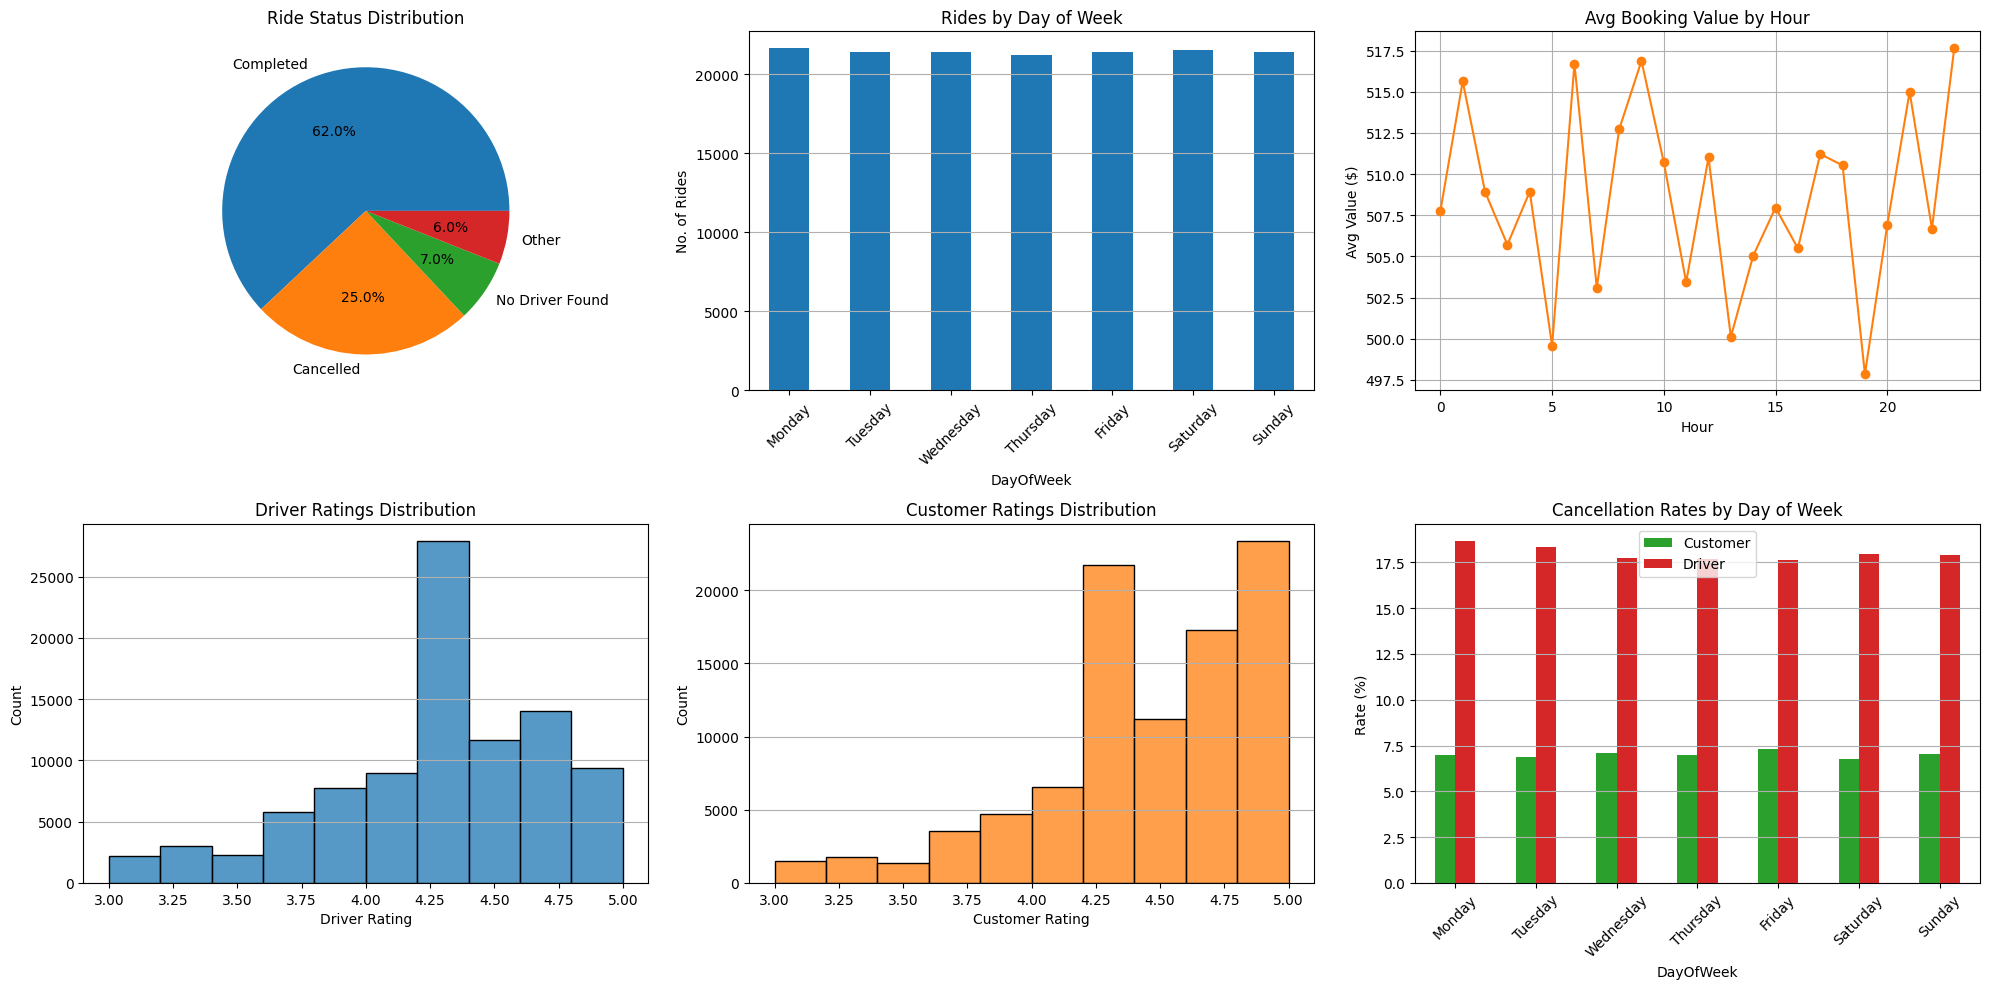

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# Data Cleaning
# -------------------------------
def clean_and_prepare_data(df):
    try:
        df_clean = df.copy()

        # Date + Time → DateTime
        df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')
        df_clean['DateTime'] = pd.to_datetime(
            df_clean['Date'].astype(str) + ' ' + df_clean['Time'].astype(str),
            errors='coerce'
        )

        df_clean = df_clean.dropna(subset=['DateTime'])

        # Features
        df_clean['Hour'] = df_clean['DateTime'].dt.hour
        df_clean['DayOfWeek'] = df_clean['DateTime'].dt.day_name()

        # Convert numeric cols
        for col in ['Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']:
            if col in df_clean.columns:
                df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

        # Flags
        if 'Booking Status' in df_clean.columns:
            def categorize_status(status):
                status = str(status).lower()
                if 'completed' in status: return 'Completed'
                elif 'cancelled' in status: return 'Cancelled'
                elif 'no driver found' in status: return 'No Driver Found'
                else: return 'Other'
            df_clean['Status_Category'] = df_clean['Booking Status'].apply(categorize_status)

        df_clean['Is_Cancelled_Customer'] = df_clean['Cancelled Rides by Customer'].notna() if 'Cancelled Rides by Customer' in df_clean.columns else False
        df_clean['Is_Cancelled_Driver'] = df_clean['Cancelled Rides by Driver'].notna() if 'Cancelled Rides by Driver' in df_clean.columns else False

        return df_clean
    except Exception as e:
        print(f"❌ Cleaning error: {e}")
        return None

# -------------------------------
# Analysis + Visualization
# -------------------------------
def analyze_all(df_clean):
    if df_clean is None or df_clean.empty:
        print("🚫 No data to analyze."); return

    print(f"\n✅ Ready for analysis with {len(df_clean):,} rides")
    print("📊 Uber Ride & Performance Analytics Report")
    print("-"*50)

    # Create 2 rows × 3 cols (6 plots max)
    fig, axes = plt.subplots(2, 3, figsize=(20, 10))
    ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()

    # 1. Ride Status Breakdown
    if 'Status_Category' in df_clean.columns:
        status_counts = df_clean['Status_Category'].value_counts()
        print("\n🔍 Ride Status Breakdown:")
        print(status_counts)
        ax1.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%',
                colors=['#1f77b4','#ff7f0e','#2ca02c','#d62728'])
        ax1.set_title("Ride Status Distribution")
    else:
        ax1.text(0.5,0.5,"No Status Data",ha="center")

    # 2. Rides by Day of Week
    rides_by_day = df_clean.groupby('DayOfWeek').size().reindex(
        ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    print("\n📅 Rides by Day of Week:")
    print(rides_by_day)
    rides_by_day.plot(kind='bar', color='#1f77b4', ax=ax2)
    ax2.set_title("Rides by Day of Week")
    ax2.set_ylabel("No. of Rides"); ax2.grid(True, axis='y'); ax2.tick_params(axis='x', rotation=45)

    # 3. Avg Booking Value by Hour
    if 'Booking Value' in df_clean.columns:
        avg_value_by_hour = df_clean.groupby('Hour')['Booking Value'].mean()
        print("\n💰 Average Booking Value by Hour:")
        print(avg_value_by_hour.round(2))
        avg_value_by_hour.plot(kind='line', marker='o', color='#ff7f0e', ax=ax3)
        ax3.set_title("Avg Booking Value by Hour")
        ax3.set_ylabel("Avg Value ($)"); ax3.grid(True)

    # 4. Driver Ratings Distribution
    if 'Driver Ratings' in df_clean.columns:
        driver_ratings = df_clean['Driver Ratings'].dropna()
        print("\n🚗 Driver Ratings Summary:")
        print(driver_ratings.describe().round(2))
        sns.histplot(driver_ratings, bins=10, color='#1f77b4', ax=ax4)
        ax4.set_title("Driver Ratings Distribution")
        ax4.set_xlabel("Driver Rating"); ax4.grid(True, axis='y')

    # 5. Customer Ratings Distribution
    if 'Customer Rating' in df_clean.columns:
        customer_ratings = df_clean['Customer Rating'].dropna()
        print("\n👤 Customer Ratings Summary:")
        print(customer_ratings.describe().round(2))
        sns.histplot(customer_ratings, bins=10, color='#ff7f0e', ax=ax5)
        ax5.set_title("Customer Ratings Distribution")
        ax5.set_xlabel("Customer Rating"); ax5.grid(True, axis='y')

    # 6. Cancellation Rates by Day
    if 'DayOfWeek' in df_clean.columns:
        cancel_rates = df_clean.groupby('DayOfWeek')[['Is_Cancelled_Customer','Is_Cancelled_Driver']].mean().reindex(
            ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
        ) * 100
        print("\n🚫 Cancellation Rates by Day of Week (%):")
        print(cancel_rates.round(2))
        cancel_rates.plot(kind='bar', ax=ax6, color=['#2ca02c','#d62728'])
        ax6.set_title("Cancellation Rates by Day of Week")
        ax6.set_ylabel("Rate (%)"); ax6.legend(['Customer','Driver']); ax6.grid(True, axis='y'); ax6.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# -------------------------------
# Main
# -------------------------------
def main():
    file_path = '/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv'
    try:
        df = pd.read_csv(file_path)
        print("✅ Data loaded successfully!")
        df_clean = clean_and_prepare_data(df)
        if df_clean is not None:
            print("🔧 Data cleaning done!")
            analyze_all(df_clean)
    except FileNotFoundError:
        print("❌ File not found. Please check path.")

if __name__ == "__main__":
    main()


### 📂 Data Loading and Cleaning
### 📊 Exploratory Data Analysis & Visualization (5 Graphs)


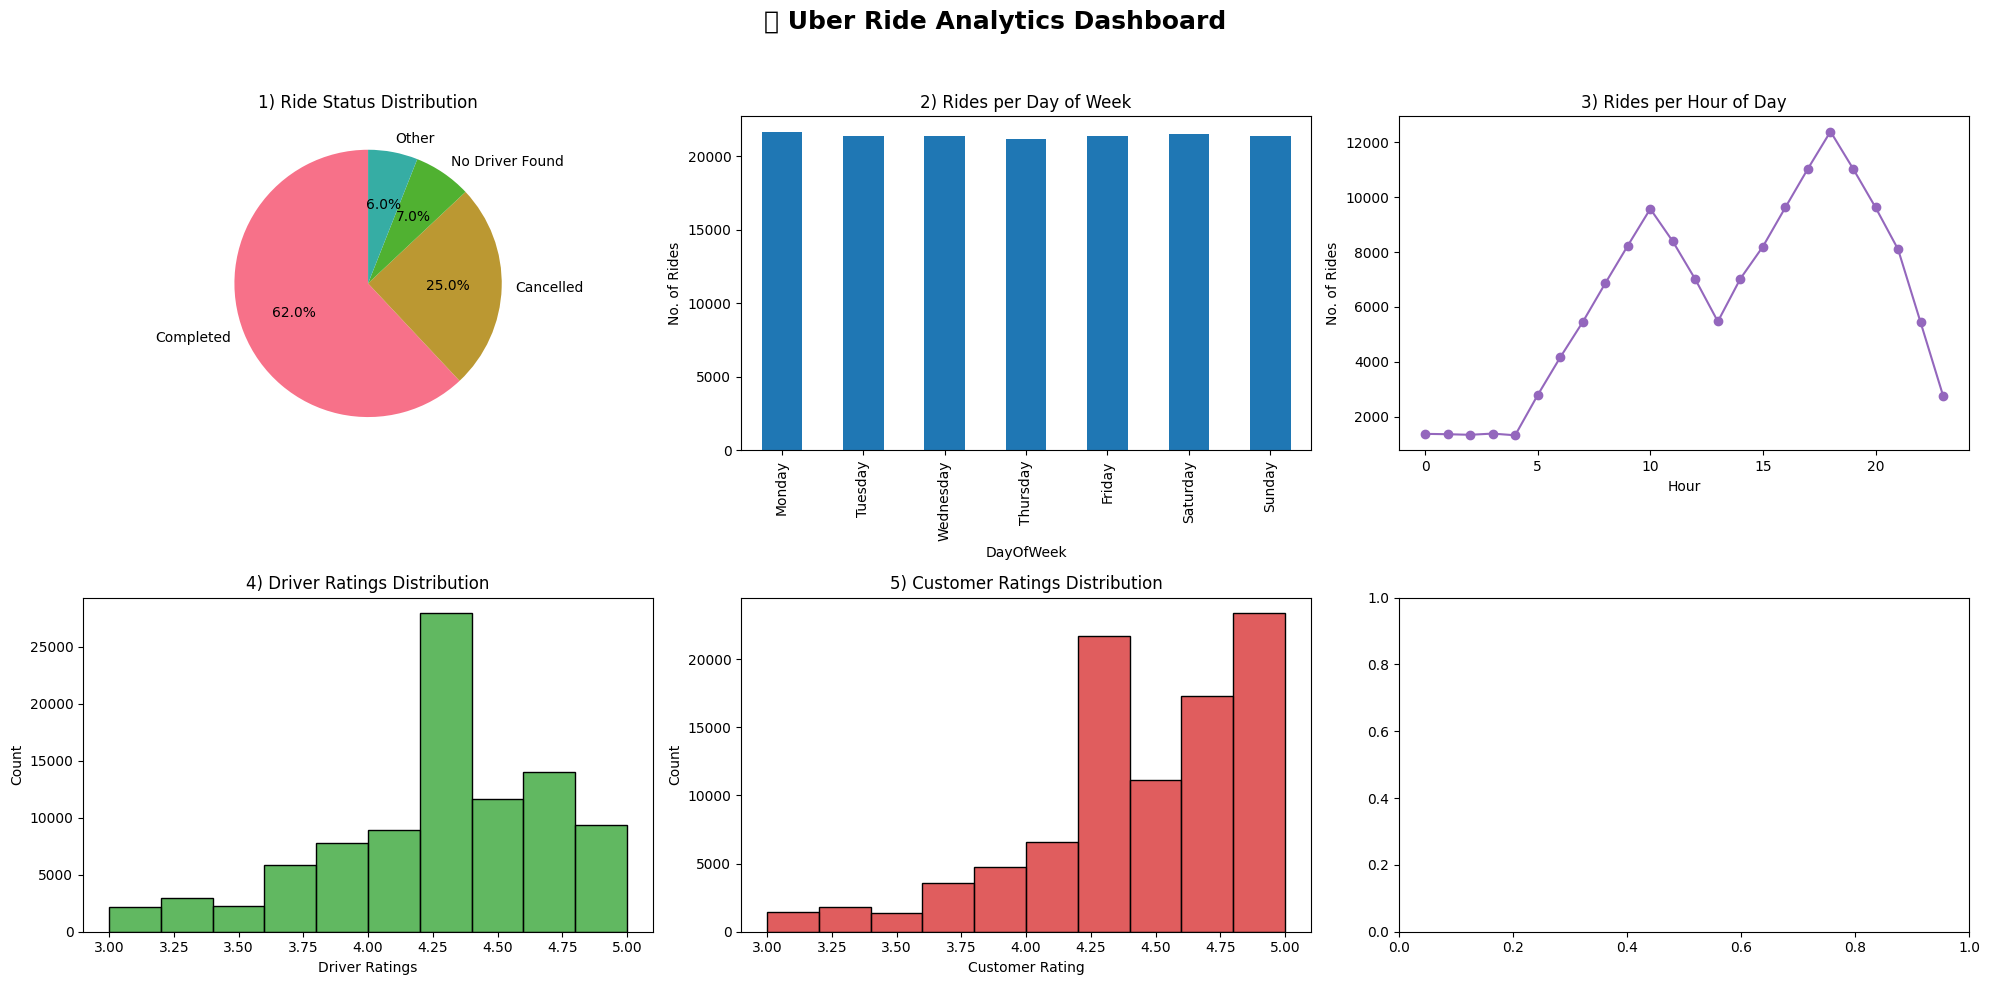

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================
# 📂 Data Loading & Cleaning
# ======================================================
def clean_and_prepare_data(df):
    df_clean = df.copy()

    # Convert Date & Time
    df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')
    df_clean['DateTime'] = pd.to_datetime(
        df_clean['Date'].astype(str) + ' ' + df_clean['Time'].astype(str),
        errors='coerce'
    )
    df_clean = df_clean.dropna(subset=['DateTime'])

    # Extract features
    df_clean['Hour'] = df_clean['DateTime'].dt.hour
    df_clean['DayOfWeek'] = df_clean['DateTime'].dt.day_name()

    # Convert numeric cols
    for col in ['Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']:
        if col in df_clean.columns:
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

    # Categorize Booking Status
    if 'Booking Status' in df_clean.columns:
        def categorize_status(status):
            status = str(status).lower()
            if 'completed' in status: return 'Completed'
            elif 'cancelled' in status: return 'Cancelled'
            elif 'no driver found' in status: return 'No Driver Found'
            else: return 'Other'
        df_clean['Status_Category'] = df_clean['Booking Status'].apply(categorize_status)

    return df_clean


# ======================================================
# 📊 Exploratory Data Analysis & Visualization
# ======================================================
def analyze_all(df_clean):
    if df_clean is None or df_clean.empty:
        print("🚫 No data to analyze."); return

    # Create subplots
    fig, axes = plt.subplots(2, 3, figsize=(20, 10))
    ax1, ax2, ax3, ax4, ax5 = axes.flatten()[:5]

    fig.suptitle("📊 Uber Ride Analytics Dashboard", fontsize=18, fontweight="bold")

    # --------------------------------------------------
    # 1) Ride Status Distribution
    # --------------------------------------------------
    status_counts = df_clean['Status_Category'].value_counts()
    ax1.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
    ax1.set_title("1) Ride Status Distribution")

    # --------------------------------------------------
    # 2) Rides per Day of Week
    # --------------------------------------------------
    rides_by_day = df_clean.groupby('DayOfWeek').size().reindex(
        ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    rides_by_day.plot(kind='bar', ax=ax2, color='#1f77b4')
    ax2.set_title("2) Rides per Day of Week"); ax2.set_ylabel("No. of Rides")

    # --------------------------------------------------
    # 3) Rides per Hour of Day
    # --------------------------------------------------
    rides_by_hour = df_clean.groupby('Hour').size()
    rides_by_hour.plot(kind='line', marker='o', ax=ax3, color='#9467bd')
    ax3.set_title("3) Rides per Hour of Day"); ax3.set_ylabel("No. of Rides")

    # --------------------------------------------------
    # 4) Driver Ratings Distribution
    # --------------------------------------------------
    sns.histplot(df_clean['Driver Ratings'].dropna(), bins=10, ax=ax4, color='#2ca02c')
    ax4.set_title("4) Driver Ratings Distribution")

    # --------------------------------------------------
    # 5) Customer Ratings Distribution
    # --------------------------------------------------
    sns.histplot(df_clean['Customer Rating'].dropna(), bins=10, ax=ax5, color='#d62728')
    ax5.set_title("5) Customer Ratings Distribution")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


# ======================================================
# 🚀 Main
# ======================================================
def main():
    print("### 📂 Data Loading and Cleaning")
    file_path = '/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv'
    df = pd.read_csv(file_path)
    df_clean = clean_and_prepare_data(df)

    print("### 📊 Exploratory Data Analysis & Visualization (5 Graphs)")
    analyze_all(df_clean)

if __name__ == "__main__":
    main()


✅ Data loaded successfully!
🔧 Data cleaning completed! Ready with 150,000 rides

🎯 EXECUTIVE SUMMARY
📊 Total Rides Analyzed: 150,000
✅ Successful Rides: 93,000
📈 Success Rate: 62.0%
💰 Total Revenue: ₹47,260,574
💵 Average Ride Value: ₹508
🛣️ Average Distance: 26.0 km
⭐ Avg Driver Rating: 4.23/5
⭐ Avg Customer Rating: 4.40/5
❌ Customer Cancellations: 10,500
🚫 Driver Cancellations: 27,000


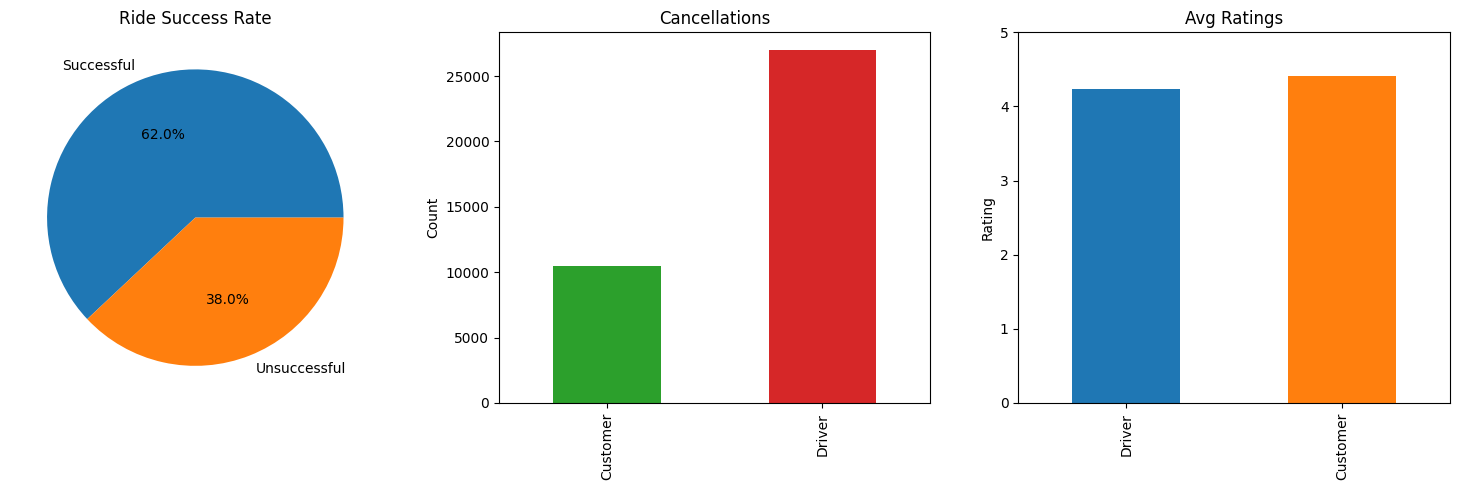


📊 Hourly Ride Patterns Analysis
      Ride Count  Total Revenue  Avg Revenue  Avg Driver Rating  \
Hour                                                              
0            858       435728.0       507.84               4.25   
1            828       425933.0       514.41               4.22   
2            853       434751.0       509.67               4.23   
3            860       433713.0       504.32               4.23   
4            830       418249.0       503.91               4.25   
5           1715       856321.0       499.31               4.23   
6           2609      1344912.0       515.49               4.23   
7           3346      1675816.0       500.84               4.24   
8           4267      2183749.0       511.78               4.23   
9           5084      2631271.0       517.56               4.23   
10          5983      3057782.0       511.08               4.23   
11          5254      2637838.0       502.06               4.23   
12          4338      2231782

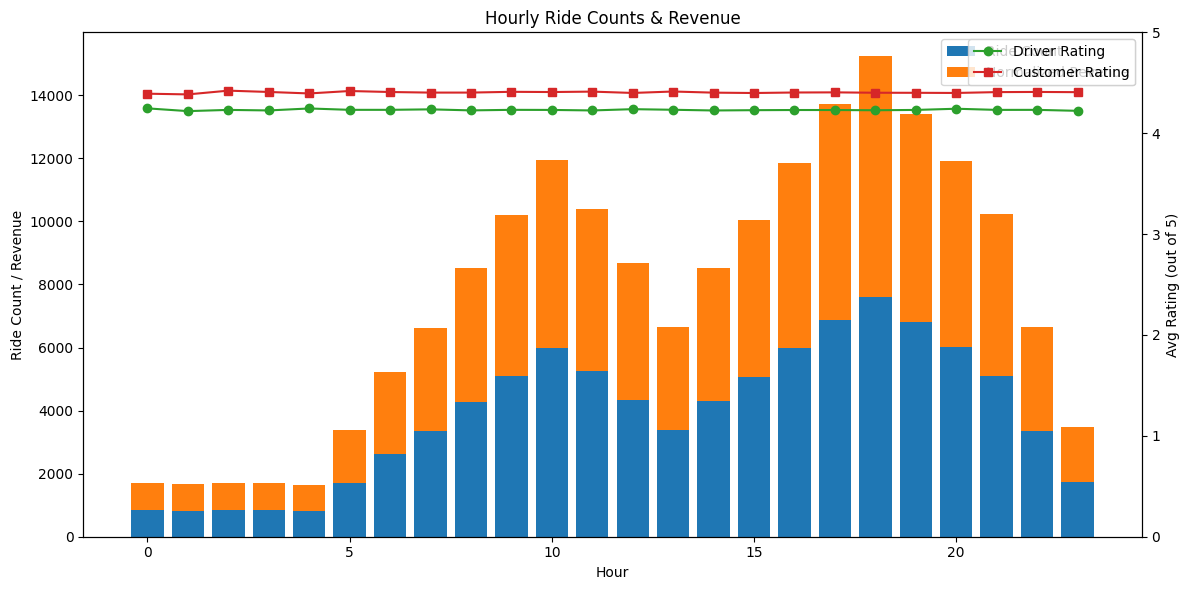

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================
# 📂 Data Cleaning & Preparation
# ======================================================
def clean_and_prepare_data(df):
    """Clean and prepare Uber ride dataset for analysis."""
    try:
        df_clean = df.copy()
        required_cols = [
            'Date', 'Time', 'Booking Status', 'Booking Value',
            'Ride Distance', 'Driver Ratings', 'Customer Rating',
            'Cancelled Rides by Customer', 'Cancelled Rides by Driver'
        ]
        missing_cols = [col for col in required_cols if col not in df_clean.columns]
        if missing_cols:
            print(f"⚠️ Warning: Missing columns: {missing_cols}. Proceeding with available columns.")

        # Date & Time conversion
        try:
            df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')
            df_clean['DateTime'] = pd.to_datetime(
                df_clean['Date'].astype(str) + ' ' + df_clean['Time'].astype(str),
                errors='coerce'
            )
        except Exception as e:
            print(f"❌ Error in date/time conversion: {e}")
            df_clean['DateTime'] = pd.NaT

        if 'DateTime' in df_clean.columns:
            df_clean['Hour'] = df_clean['DateTime'].dt.hour
            df_clean['DayOfWeek'] = df_clean['DateTime'].dt.day_name()

        # Booking Status categorization
        if 'Booking Status' in df_clean.columns:
            def categorize_status(status):
                status = str(status).lower()
                if 'completed' in status: return 'Completed'
                elif 'cancelled' in status: return 'Cancelled'
                elif 'no driver found' in status: return 'No Driver Found'
                else: return 'Other'
            df_clean['Status_Category'] = df_clean['Booking Status'].apply(categorize_status)
            df_clean['Is_Successful'] = df_clean['Booking Status'] == 'Completed'
            df_clean['Is_Cancelled_Customer'] = df_clean['Cancelled Rides by Customer'].notna()
            df_clean['Is_Cancelled_Driver'] = df_clean['Cancelled Rides by Driver'].notna()

        # Numeric conversion
        for col in ['Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']:
            if col in df_clean.columns:
                df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

        df_clean = df_clean.dropna(subset=['DateTime'])
        return df_clean
    except Exception as e:
        print(f"❌ Fatal error in data cleaning: {e}")
        return None


# ======================================================
# 📂 Dataset Loader
# ======================================================
def load_dataset(file_path):
    """Load dataset from CSV file."""
    try:
        df = pd.read_csv(file_path)
        print("✅ Data loaded successfully!")
        return df
    except Exception as e:
        print(f"❌ Error loading data: {e}")
        return None


# ======================================================
# 📊 Executive Summary
# ======================================================
def create_executive_summary(df):
    """Generate key business metrics and visualize on a single plot."""
    if df is None or df.empty:
        print("🚫 No data to analyze.")
        return None

    metrics = {}
    try:
        # Calculations
        metrics['total_rides'] = len(df)
        metrics['successful_rides'] = df['Is_Successful'].sum() if 'Is_Successful' in df.columns else 0
        metrics['success_rate'] = (metrics['successful_rides'] / metrics['total_rides'] * 100 
                                   if metrics['total_rides'] > 0 else 0)
        metrics['total_revenue'] = df[df['Is_Successful']]['Booking Value'].sum() if 'Booking Value' in df.columns else 0
        metrics['avg_ride_value'] = df[df['Is_Successful']]['Booking Value'].mean() if 'Booking Value' in df.columns else 0
        metrics['avg_distance'] = df[df['Is_Successful']]['Ride Distance'].mean() if 'Ride Distance' in df.columns else 0
        metrics['avg_driver_rating'] = df[df['Is_Successful']]['Driver Ratings'].mean() if 'Driver Ratings' in df.columns else 0
        metrics['avg_customer_rating'] = df[df['Is_Successful']]['Customer Rating'].mean() if 'Customer Rating' in df.columns else 0
        metrics['customer_cancellations'] = df['Is_Cancelled_Customer'].sum() if 'Is_Cancelled_Customer' in df.columns else 0
        metrics['driver_cancellations'] = df['Is_Cancelled_Driver'].sum() if 'Is_Cancelled_Driver' in df.columns else 0

        # Print summary
        print("\n🎯 EXECUTIVE SUMMARY")
        print("=" * 50)
        print(f"📊 Total Rides Analyzed: {metrics['total_rides']:,}")
        print(f"✅ Successful Rides: {metrics['successful_rides']:,}")
        print(f"📈 Success Rate: {metrics['success_rate']:.1f}%")
        print(f"💰 Total Revenue: ₹{metrics['total_revenue']:,.0f}")
        print(f"💵 Average Ride Value: ₹{metrics['avg_ride_value']:.0f}")
        print(f"🛣️ Average Distance: {metrics['avg_distance']:.1f} km")
        print(f"⭐ Avg Driver Rating: {metrics['avg_driver_rating']:.2f}/5")
        print(f"⭐ Avg Customer Rating: {metrics['avg_customer_rating']:.2f}/5")
        print(f"❌ Customer Cancellations: {metrics['customer_cancellations']:,}")
        print(f"🚫 Driver Cancellations: {metrics['driver_cancellations']:,}")

        # Plots
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
        
        # Success Rate Pie
        success_counts = [metrics['successful_rides'], metrics['total_rides'] - metrics['successful_rides']]
        ax1.pie(success_counts, labels=['Successful', 'Unsuccessful'], autopct='%1.1f%%', colors=['#1f77b4','#ff7f0e'])
        ax1.set_title('Ride Success Rate')

        # Cancellations
        cancel_data = pd.Series({'Customer': metrics['customer_cancellations'],'Driver': metrics['driver_cancellations']})
        cancel_data.plot(kind='bar', color=['#2ca02c','#d62728'], ax=ax2)
        ax2.set_title('Cancellations'); ax2.set_ylabel('Count')

        # Ratings Comparison
        ratings_data = pd.Series({'Driver': metrics['avg_driver_rating'],'Customer': metrics['avg_customer_rating']})
        ratings_data.plot(kind='bar', color=['#1f77b4','#ff7f0e'], ax=ax3)
        ax3.set_title('Avg Ratings'); ax3.set_ylim(0, 5); ax3.set_ylabel('Rating')

        plt.tight_layout()
        plt.show()

        return metrics
    except Exception as e:
        print(f"❌ Error in executive summary: {e}")
        return None


# ======================================================
# 📊 Hourly Pattern Analysis
# ======================================================
def analyze_hourly_patterns(df):
    """Analyze hourly ride patterns and visualize."""
    if df is None or df.empty:
        print("🚫 No data to analyze.")
        return None

    print("\n📊 Hourly Ride Patterns Analysis")
    print("=" * 50)

    hourly_data = df[df['Is_Successful']].groupby('Hour').agg({
        'Booking Value': ['count','sum','mean'],
        'Driver Ratings': 'mean',
        'Customer Rating': 'mean'
    }).fillna(0)
    hourly_data.columns = ['Ride Count','Total Revenue','Avg Revenue','Avg Driver Rating','Avg Customer Rating']
    print(hourly_data.round(2))

    # Plot
    fig, ax1 = plt.subplots(figsize=(12,6))
    hours = hourly_data.index
    ride_counts = hourly_data['Ride Count']
    total_revenue = hourly_data['Total Revenue'] / hourly_data['Total Revenue'].max() * ride_counts.max()

    ax1.bar(hours, ride_counts, color='#1f77b4', label='Ride Count')
    ax1.bar(hours, total_revenue, bottom=ride_counts, color='#ff7f0e', label='Normalized Revenue')
    ax1.set_xlabel('Hour'); ax1.set_ylabel('Ride Count / Revenue')
    ax1.set_title('Hourly Ride Counts & Revenue'); ax1.legend()

    # Ratings overlay
    ax2 = ax1.twinx()
    ax2.plot(hours, hourly_data['Avg Driver Rating'], color='#2ca02c', marker='o', label='Driver Rating')
    ax2.plot(hours, hourly_data['Avg Customer Rating'], color='#d62728', marker='s', label='Customer Rating')
    ax2.set_ylabel('Avg Rating (out of 5)'); ax2.set_ylim(0,5)
    ax2.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

    return hourly_data


# ======================================================
# 🚀 Main
# ======================================================
def main():
    file_path = '/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv'
    df = load_dataset(file_path)
    if df is not None:
        df_clean = clean_and_prepare_data(df)
        if df_clean is not None:
            print(f"🔧 Data cleaning completed! Ready with {len(df_clean):,} rides")
            create_executive_summary(df_clean)
            analyze_hourly_patterns(df_clean)

if __name__ == "__main__":
    main()


✅ Data loaded successfully!
🔧 Data cleaning completed! 150,000 rides ready

### 📊 Success Factors Analysis


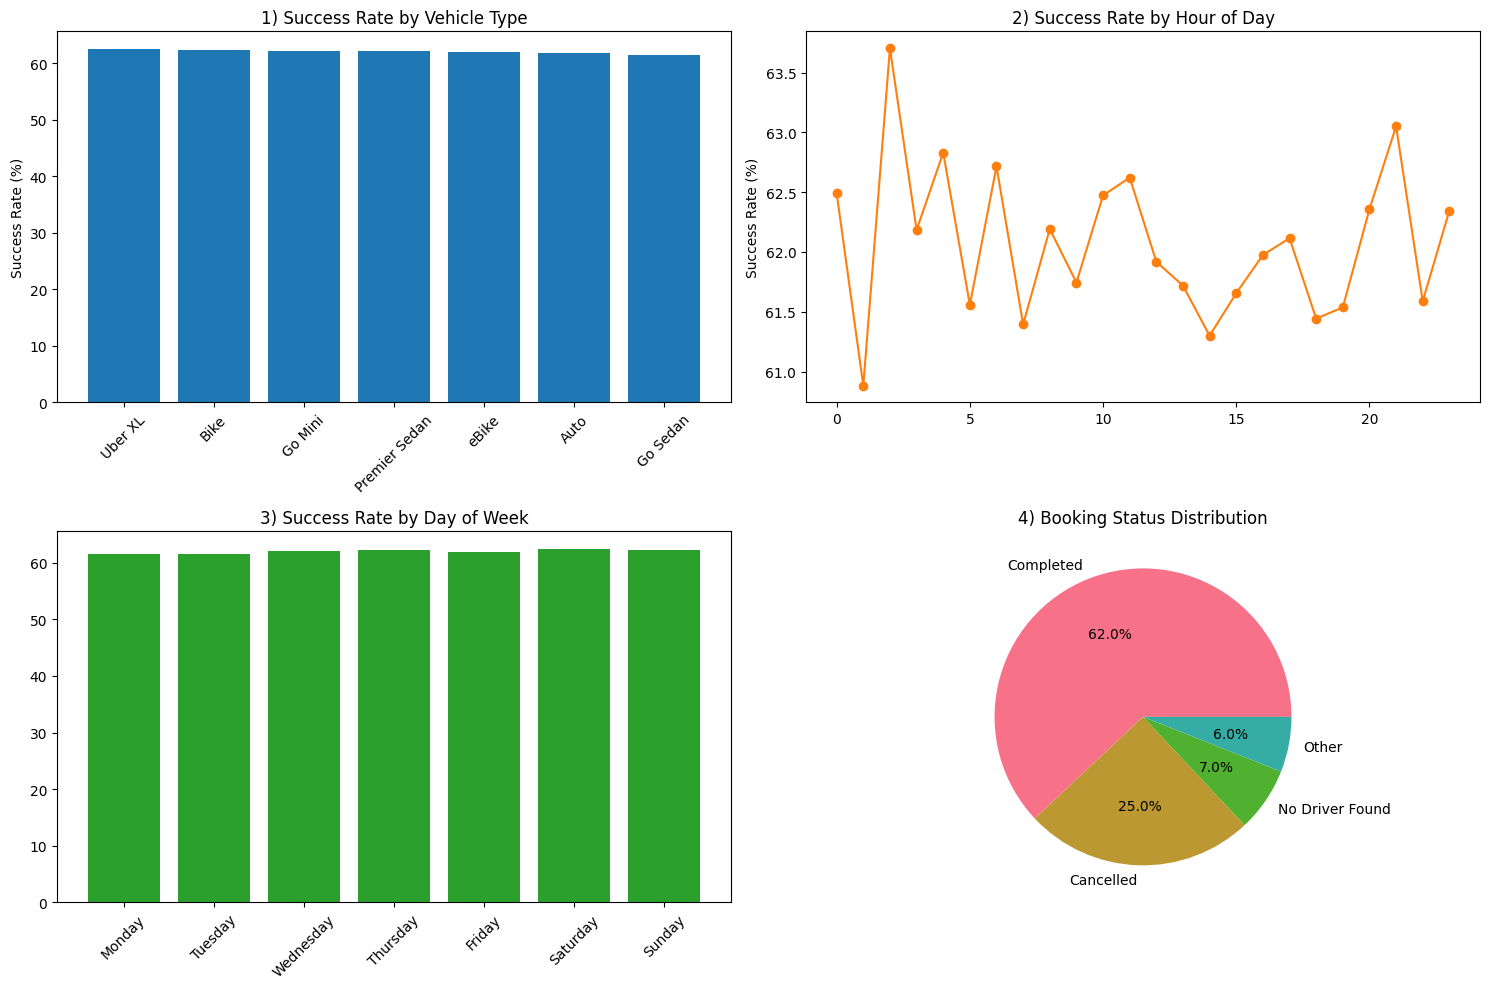


### 📊 Executive Summary & Hourly Trends

🎯 EXECUTIVE SUMMARY
📊 Total Rides: 150000
✅ Successful Rides: 93000
📈 Success Rate: 62.0%


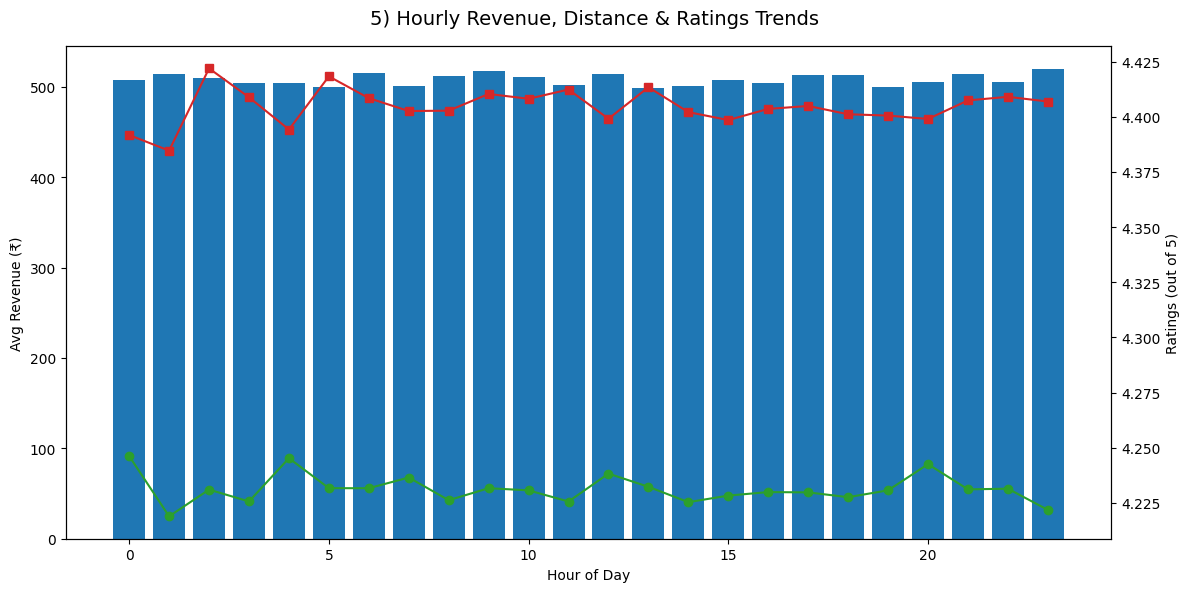

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================
# 📂 Data Loading & Cleaning
# ======================================================
def clean_and_prepare_data(df):
    """Clean and prepare Uber ride dataset for analysis."""
    try:
        df_clean = df.copy()
        
        # Convert date & time
        df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')
        df_clean['DateTime'] = pd.to_datetime(
            df_clean['Date'].astype(str) + ' ' + df_clean['Time'].astype(str),
            errors='coerce'
        )
        df_clean = df_clean.dropna(subset=['DateTime'])
        
        # Extract features
        df_clean['Hour'] = df_clean['DateTime'].dt.hour
        df_clean['DayOfWeek'] = df_clean['DateTime'].dt.day_name()
        
        # Categorize booking status
        if 'Booking Status' in df_clean.columns:
            def categorize_status(status):
                status = str(status).lower()
                if 'completed' in status: return 'Completed'
                elif 'cancelled' in status: return 'Cancelled'
                elif 'no driver found' in status: return 'No Driver Found'
                else: return 'Other'
            df_clean['Status_Category'] = df_clean['Booking Status'].apply(categorize_status)
            df_clean['Is_Successful'] = df_clean['Booking Status'] == 'Completed'
            if 'Cancelled Rides by Customer' in df_clean.columns:
                df_clean['Is_Cancelled_Customer'] = df_clean['Cancelled Rides by Customer'].notna()
            if 'Cancelled Rides by Driver' in df_clean.columns:
                df_clean['Is_Cancelled_Driver'] = df_clean['Cancelled Rides by Driver'].notna()
        
        # Numeric columns
        for col in ['Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']:
            if col in df_clean.columns:
                df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        
        return df_clean
    except Exception as e:
        print(f"❌ Error in data cleaning: {e}")
        return None


def load_dataset(file_path):
    """Load dataset from CSV file."""
    try:
        df = pd.read_csv(file_path)
        print("✅ Data loaded successfully!")
        return df
    except Exception as e:
        print(f"❌ Error loading data: {e}")
        return None


# ======================================================
# 📊 1) Success Factors Analysis (4 Graphs)
# ======================================================
def analyze_success_factors(df):
    if df is None or df.empty:
        print("🚫 No data to analyze."); return
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()
    
    # 1) Success Rate by Vehicle Type
    if 'Vehicle Type' in df.columns:
        vehicle_success = df.groupby('Vehicle Type')['Is_Successful'].mean().sort_values(ascending=False)
        axes[0].bar(vehicle_success.index, vehicle_success * 100, color='#1f77b4')
        axes[0].set_title("1) Success Rate by Vehicle Type")
        axes[0].set_ylabel("Success Rate (%)")
        axes[0].tick_params(axis='x', rotation=45)
    else:
        axes[0].text(0.5, 0.5, "Vehicle Type missing", ha="center")
    
    # 2) Success Rate by Hour
    if 'Hour' in df.columns:
        hourly_success = df.groupby('Hour')['Is_Successful'].mean()
        axes[1].plot(hourly_success.index, hourly_success * 100, marker='o', color='#ff7f0e')
        axes[1].set_title("2) Success Rate by Hour of Day")
        axes[1].set_ylabel("Success Rate (%)")
    else:
        axes[1].text(0.5, 0.5, "Hour missing", ha="center")
    
    # 3) Success Rate by Day of Week
    if 'DayOfWeek' in df.columns:
        daily_success = df.groupby('DayOfWeek')['Is_Successful'].mean()
        order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
        daily_success = daily_success.reindex(order)
        axes[2].bar(daily_success.index, daily_success * 100, color='#2ca02c')
        axes[2].set_title("3) Success Rate by Day of Week")
        axes[2].tick_params(axis='x', rotation=45)
    else:
        axes[2].text(0.5, 0.5, "DayOfWeek missing", ha="center")
    
    # 4) Booking Status Distribution
    if 'Status_Category' in df.columns:
        status_counts = df['Status_Category'].value_counts()
        axes[3].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%')
        axes[3].set_title("4) Booking Status Distribution")
    else:
        axes[3].text(0.5, 0.5, "Status missing", ha="center")
    
    plt.tight_layout()
    plt.show()


# ======================================================
# 📊 2) Executive Summary + Hourly Trends (1 Graph)
# ======================================================
def create_executive_summary(df):
    if df is None or df.empty:
        print("🚫 No data to analyze."); return
    
    print("\n🎯 EXECUTIVE SUMMARY")
    print("=" * 50)
    total_rides = len(df)
    successful_rides = df['Is_Successful'].sum()
    print(f"📊 Total Rides: {total_rides}")
    print(f"✅ Successful Rides: {successful_rides}")
    print(f"📈 Success Rate: {successful_rides/total_rides*100:.1f}%")
    
    # Hourly revenue & ratings plot
    if 'Hour' in df.columns and 'Booking Value' in df.columns:
        hourly_data = df[df['Is_Successful']].groupby('Hour').agg({
            'Booking Value': 'mean',
            'Ride Distance': 'mean',
            'Driver Ratings': 'mean',
            'Customer Rating': 'mean'
        }).fillna(0)
        
        fig, ax1 = plt.subplots(figsize=(12, 6))
        ax1.bar(hourly_data.index, hourly_data['Booking Value'], color='#1f77b4', label="Avg Revenue (₹)")
        ax1.set_xlabel("Hour of Day"); ax1.set_ylabel("Avg Revenue (₹)")
        
        ax2 = ax1.twinx()
        ax2.plot(hourly_data.index, hourly_data['Driver Ratings'], color='#2ca02c', marker='o', label="Driver Rating")
        ax2.plot(hourly_data.index, hourly_data['Customer Rating'], color='#d62728', marker='s', label="Customer Rating")
        ax2.set_ylabel("Ratings (out of 5)")
        
        fig.suptitle("5) Hourly Revenue, Distance & Ratings Trends", fontsize=14)
        plt.tight_layout(); plt.show()


# ======================================================
# 🚀 Main
# ======================================================
def main():
    file_path = '/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv'
    df = load_dataset(file_path)
    if df is not None:
        df_clean = clean_and_prepare_data(df)
        if df_clean is not None:
            print(f"🔧 Data cleaning completed! {len(df_clean):,} rides ready")
            
            print("\n### 📊 Success Factors Analysis")
            analyze_success_factors(df_clean)
            
            print("\n### 📊 Executive Summary & Hourly Trends")
            create_executive_summary(df_clean)

if __name__ == "__main__":
    main()


✅ Data loaded successfully!
🔧 Data cleaning completed! Ready with 150,000 rides

📊 Comprehensive Uber Ride Analysis

🔍 Missing Data Analysis:
                                   Missing Count  Percentage
Incomplete Rides                          141000        94.0
Incomplete Rides Reason                   141000        94.0
Reason for cancelling by Customer         139500        93.0
Cancelled Rides by Customer               139500        93.0
Driver Cancellation Reason                123000        82.0
Cancelled Rides by Driver                 123000        82.0
Customer Rating                            57000        38.0
Driver Ratings                             57000        38.0
Payment Method                             48000        32.0
Booking Value                              48000        32.0
Ride Distance                              48000        32.0
Avg CTAT                                   48000        32.0
Avg VTAT                                   10500         7.0

🎯 E

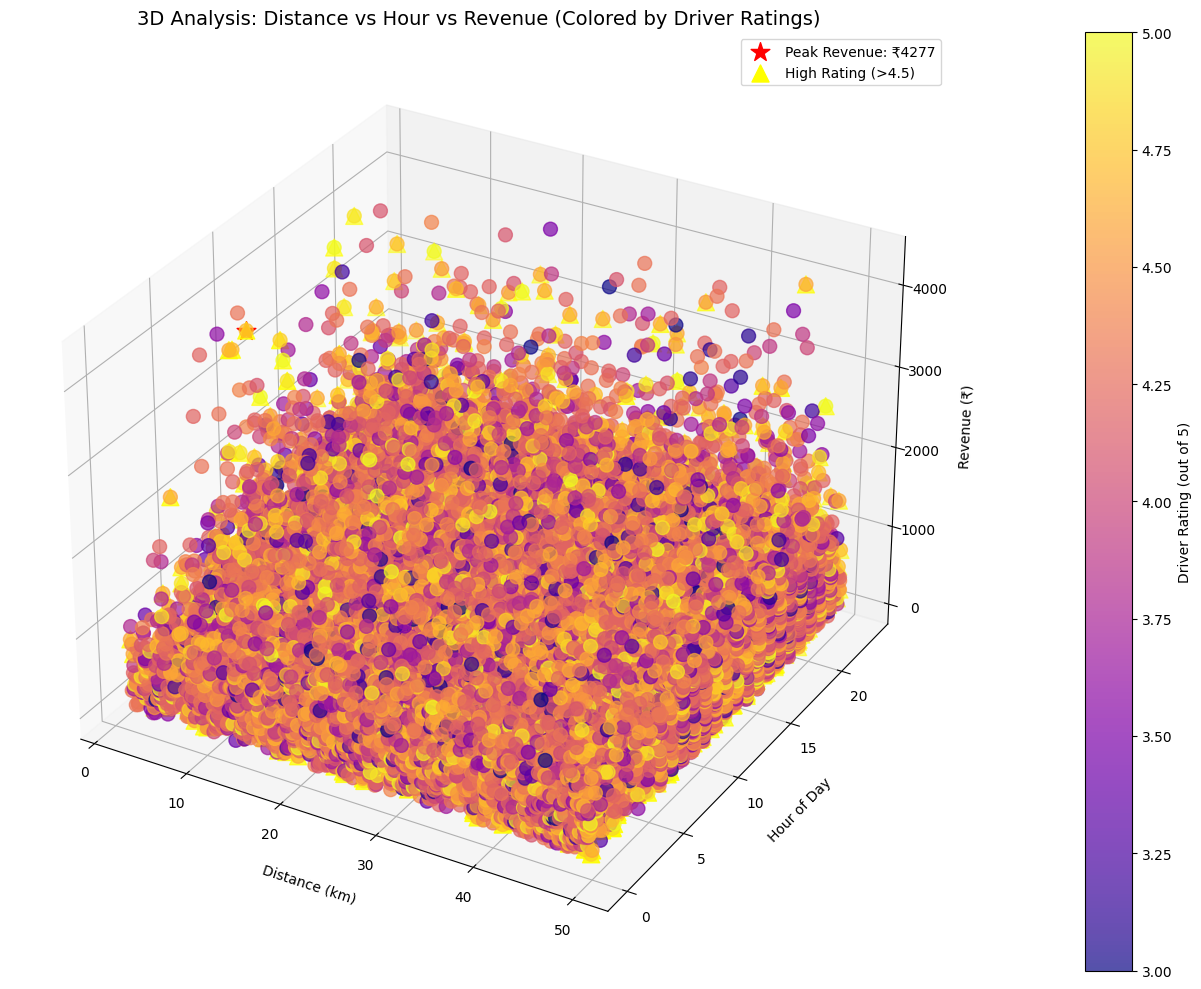

In [7]:
def comprehensive_ride_analysis(df):
    """Comprehensive analysis combining missing data, executive summary, success factors, revenue, and time-based patterns with 3D visualization (Bike excluded in Vehicle Analysis)."""
    if df is None or df.empty:
        print("🚫 No data to analyze.")
        return None
    
    print("\n📊 Comprehensive Uber Ride Analysis")
    print("=" * 50)
    
    # 🔍 Missing Data Analysis
    print("\n🔍 Missing Data Analysis:")
    missing_data = df.isnull().sum()
    missing_percentage = (missing_data / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Count': missing_data,
        'Percentage': missing_percentage
    }).sort_values('Missing Count', ascending=False)
    missing_cols = missing_df[missing_df['Missing Count'] > 0]
    if not missing_cols.empty:
        print(missing_cols)
    else:
        print("🎉 No missing data found!")
    
    # 🎯 Executive Summary
    metrics = {}
    try:
        metrics['total_rides'] = len(df)
        metrics['successful_rides'] = (df['Is_Successful'].sum() 
                                      if 'Is_Successful' in df.columns else 0)
        metrics['success_rate'] = (metrics['successful_rides'] / metrics['total_rides'] * 100 
                                  if metrics['total_rides'] > 0 else 0)
        metrics['total_revenue'] = (df[df['Is_Successful']]['Booking Value'].sum() 
                                   if 'Booking Value' in df.columns and 'Is_Successful' in df.columns else 0)
        metrics['avg_ride_value'] = (df[df['Is_Successful']]['Booking Value'].mean() 
                                    if 'Booking Value' in df.columns and 'Is_Successful' in df.columns else 0)
        metrics['avg_distance'] = (df[df['Is_Successful']]['Ride Distance'].mean() 
                                  if 'Ride Distance' in df.columns and 'Is_Successful' in df.columns else 0)
        metrics['avg_driver_rating'] = (df[df['Is_Successful']]['Driver Ratings'].mean() 
                                      if 'Driver Ratings' in df.columns and 'Is_Successful' in df.columns else 0)
        metrics['avg_customer_rating'] = (df[df['Is_Successful']]['Customer Rating'].mean() 
                                        if 'Customer Rating' in df.columns and 'Is_Successful' in df.columns else 0)
        metrics['customer_cancellations'] = (df['Is_Cancelled_Customer'].sum() 
                                           if 'Is_Cancelled_Customer' in df.columns else 0)
        metrics['driver_cancellations'] = (df['Is_Cancelled_Driver'].sum() 
                                          if 'Is_Cancelled_Driver' in df.columns else 0)
        
        print("\n🎯 EXECUTIVE SUMMARY")
        print("=" * 50)
        print(f"📊 Total Rides Analyzed: {metrics['total_rides']:,}")
        print(f"✅ Successful Rides: {metrics['successful_rides']:,}")
        print(f"📈 Success Rate: {metrics['success_rate']:.1f}%")
        print(f"💰 Total Revenue: ₹{metrics['total_revenue']:,.0f}" 
              if metrics['total_revenue'] > 0 else "💰 Total Revenue: Not available")
        print(f"💵 Average Ride Value: ₹{metrics['avg_ride_value']:.0f}" 
              if metrics['avg_ride_value'] > 0 else "💵 Average Ride Value: Not available")
        print(f"🛣️ Average Distance: {metrics['avg_distance']:.1f} km" 
              if metrics['avg_distance'] > 0 else "🛣️ Average Distance: Not available")
        print(f"⭐ Avg Driver Rating: {metrics['avg_driver_rating']:.2f}/5" 
              if metrics['avg_driver_rating'] > 0 else "⭐ Avg Driver Rating: Not available")
        print(f"⭐ Avg Customer Rating: {metrics['avg_customer_rating']:.2f}/5" 
              if metrics['avg_customer_rating'] > 0 else "⭐ Avg Customer Rating: Not available")
        print(f"❌ Customer Cancellations: {metrics['customer_cancellations']:,}")
        print(f"🚫 Driver Cancellations: {metrics['driver_cancellations']:,}")
    
    except Exception as e:
        print(f"❌ Error in executive summary: {e}")
    
    # 🏆 Success Factors Analysis (Bike removed)
    success_data = {}
    if 'Vehicle Type' in df.columns and 'Is_Successful' in df.columns:
        df_vehicle = df[df['Vehicle Type'] != 'Bike']   # 🚫 Remove Bike
        vehicle_success = df_vehicle.groupby('Vehicle Type').agg({
            'Is_Successful': ['count', 'sum', 'mean']
        }).round(3)
        vehicle_success.columns = ['Total_Rides', 'Successful_Rides', 'Success_Rate']
        vehicle_success = vehicle_success.sort_values('Success_Rate', ascending=False)
        print("\n🏆 TOP PERFORMING VEHICLE TYPES (Bike removed):")
        print(vehicle_success.head())
        success_data['vehicle_success'] = vehicle_success
    
    if 'Hour' in df.columns and 'Is_Successful' in df.columns:
        hourly_success = df.groupby('Hour').agg({
            'Is_Successful': ['count', 'sum', 'mean']
        }).round(3)
        hourly_success.columns = ['Total_Rides', 'Successful_Rides', 'Success_Rate']
        print("\n⏰ Success Rate by Hour:")
        print(hourly_success[['Success_Rate']].head())
        success_data['hourly_success'] = hourly_success
    
    if 'DayOfWeek' in df.columns and 'Is_Successful' in df.columns:
        daily_success = df.groupby('DayOfWeek').agg({
            'Is_Successful': ['count', 'sum', 'mean']
        }).round(3)
        daily_success.columns = ['Total_Rides', 'Successful_Rides', 'Success_Rate']
        day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        daily_success = daily_success.reindex(day_order)
        print("\n📅 Success Rate by Day of Week:")
        print(daily_success[['Success_Rate']])
        success_data['daily_success'] = daily_success
    
    if 'Status_Category' in df.columns:
        status_counts = df['Status_Category'].value_counts()
        print("\n🔍 Booking Status Distribution:")
        print(status_counts)
        success_data['status_counts'] = status_counts
    
    # 🚗 Revenue Patterns Analysis (Bike removed)
    revenue_data = {}
    successful_rides = df[df['Is_Successful']].copy() if 'Is_Successful' in df.columns else df.copy()
    if 'Vehicle Type' in df.columns and 'Booking Value' in df.columns:
        df_revenue = successful_rides[successful_rides['Vehicle Type'] != 'Bike']  # 🚫 Remove Bike
        vehicle_revenue = df_revenue.groupby('Vehicle Type').agg({
            'Booking Value': ['sum', 'mean', 'count']
        }).round(2)
        vehicle_revenue.columns = ['Total_Revenue', 'Avg_Revenue', 'Ride_Count']
        vehicle_revenue['Revenue_Share'] = (vehicle_revenue['Total_Revenue'] / 
                                         vehicle_revenue['Total_Revenue'].sum() * 100).round(2)
        vehicle_revenue = vehicle_revenue.sort_values('Revenue_Share', ascending=False)
        print("\n🚗 REVENUE BY VEHICLE TYPE (Bike removed):")
        print(vehicle_revenue)
        revenue_data['vehicle_revenue'] = vehicle_revenue
    
    if 'Hour' in df.columns and 'Booking Value' in df.columns:
        hourly_revenue = successful_rides.groupby('Hour')['Booking Value'].mean()
        print("\n⏰ Average Revenue by Hour:")
        print(hourly_revenue.round(2))
        revenue_data['hourly_revenue'] = hourly_revenue
    
    # 📅 Time-Based Patterns Analysis (unchanged, Bike not relevant here)
    time_data = {}
    if 'Date' in df.columns:
        daily_rides = df.groupby('Date').size()
        print("\n📅 Daily Ride Volume:")
        print(daily_rides.head())
        time_data['daily_rides'] = daily_rides
    
    if 'Hour' in df.columns:
        hourly_rides = df.groupby('Hour').size()
        print("\n⏰ Rides by Hour of Day:")
        print(hourly_rides)
        print(f"🌅 Peak hour: {hourly_rides.idxmax()}:00 with {hourly_rides.max()} rides")
        print(f"🌙 Quietest hour: {hourly_rides.idxmin()}:00 with {hourly_rides.min()} rides")
        time_data['hourly_rides'] = hourly_rides
    
    if 'IsWeekend' in df.columns and 'Is_Successful' in df.columns:
        weekend_comparison = df.groupby('IsWeekend').agg({
            'Is_Successful': ['count', 'sum', 'mean'],
            'Booking Value': 'mean'
        }).round(3)
        print("\n📈 Weekend vs Weekday Comparison:")
        print(weekend_comparison)
        print(f"📈 Weekend success rate: {weekend_comparison.loc[True, ('Is_Successful', 'mean')]*100:.1f}%")
        print(f"📈 Weekday success rate: {weekend_comparison.loc[False, ('Is_Successful', 'mean')]*100:.1f}%")
        time_data['weekend_comparison'] = weekend_comparison
    
    if 'Month' in df.columns and 'Is_Successful' in df.columns:
        monthly_stats = df.groupby('Month').agg({
            'Is_Successful': ['count', 'mean'],
            'Booking Value': 'mean'
        }).round(3)
        print("\n📅 Monthly Trends:")
        print(monthly_stats)
        time_data['monthly_stats'] = monthly_stats
    
    # 📈 Kamal Ka 3D Visualization (unchanged)
    if 'Ride Distance' in df.columns and 'Booking Value' in df.columns and 'Hour' in df.columns and 'Driver Ratings' in df.columns:
        print("\n📈 Kamal Ka 3D Visualization of Time-Based Revenue and Ratings")
        fig = plt.figure(figsize=(14, 10))
        ax = fig.add_subplot(111, projection='3d')
        
        valid_data = successful_rides[['Ride Distance', 'Booking Value', 'Hour', 'Driver Ratings']].dropna()
        x = valid_data['Ride Distance']
        y = valid_data['Hour']
        z = valid_data['Booking Value']
        c = valid_data['Driver Ratings']
        
        scatter = ax.scatter(x, y, z, c=c, cmap='plasma', s=100, alpha=0.7)
        ax.set_xlabel('Distance (km)', fontsize=10, labelpad=10)
        ax.set_ylabel('Hour of Day', fontsize=10, labelpad=10)
        ax.set_zlabel('Revenue (₹)', fontsize=10, labelpad=10)
        ax.set_title('3D Analysis: Distance vs Hour vs Revenue (Colored by Driver Ratings)', fontsize=14)
        
        cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
        cbar.set_label('Driver Rating (out of 5)', fontsize=10)
        
        peak_idx = z.idxmax()
        ax.scatter([x[peak_idx]], [y[peak_idx]], [z[peak_idx]], color='red', s=200, marker='*', 
                   label=f'Peak Revenue: ₹{z[peak_idx]:.0f}')
        
        high_rating = valid_data[valid_data['Driver Ratings'] >= 4.5]
        if not high_rating.empty:
            ax.scatter(high_rating['Ride Distance'], high_rating['Hour'], high_rating['Booking Value'], 
                       color='yellow', s=150, marker='^', label='High Rating (>4.5)')
        
        ax.legend()
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ Required columns not found for 3D visualization.")
    
    return {
        'metrics': metrics,
        'missing_data': missing_df,
        'success_data': success_data,
        'revenue_data': revenue_data,
        'time_data': time_data
    }

def main():
    file_path = '/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv'
    df = load_dataset(file_path)
    if df is not None:
        df_clean = clean_and_prepare_data(df)
        if df_clean is not None:
            print(f"🔧 Data cleaning completed! Ready with {len(df_clean):,} rides")
            comprehensive_ride_analysis(df_clean)

if __name__ == "__main__":
    main()

✅ Data loaded successfully!
🔧 Data cleaning completed! Ready with 150,000 rides

📊 Comprehensive Uber Ride Analysis

🔍 Missing Data Analysis:
                                   Missing Count  Percentage
Incomplete Rides                          141000        94.0
Incomplete Rides Reason                   141000        94.0
Reason for cancelling by Customer         139500        93.0
Cancelled Rides by Customer               139500        93.0
Driver Cancellation Reason                123000        82.0
Cancelled Rides by Driver                 123000        82.0
Customer Rating                            57000        38.0
Driver Ratings                             57000        38.0
Payment Method                             48000        32.0
Booking Value                              48000        32.0
Ride Distance                              48000        32.0
Avg CTAT                                   48000        32.0
Avg VTAT                                   10500         7.0

🎯 E

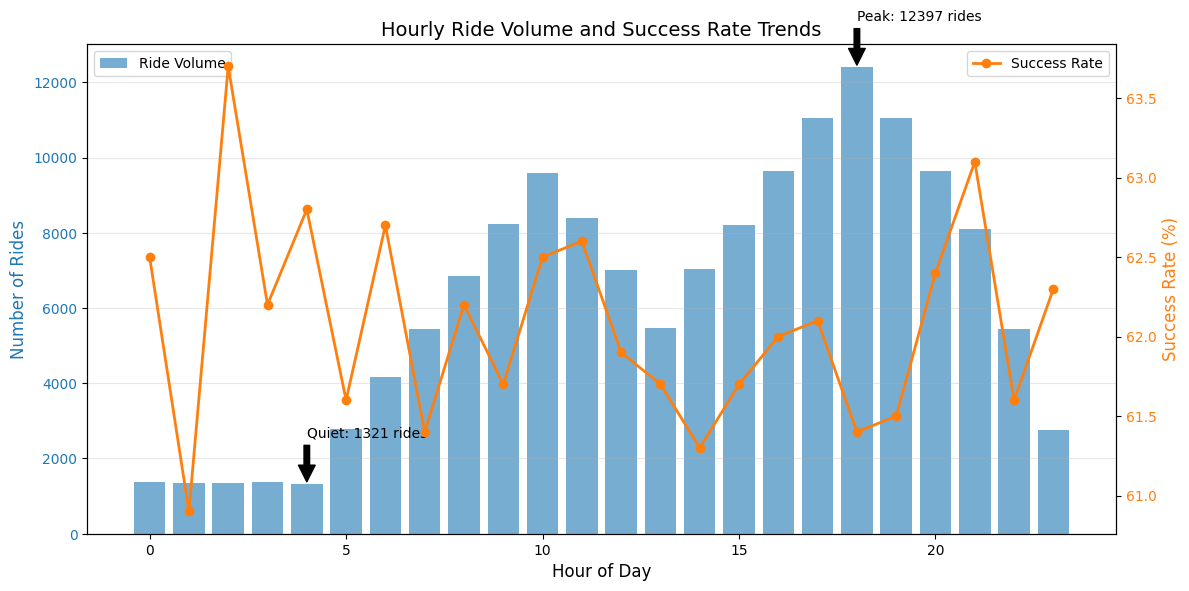

In [8]:
def comprehensive_ride_analysis(df):
    """Comprehensive analysis excluding 'Bike' values but keeping all plots intact."""
    if df is None or df.empty:
        print("🚫 No data to analyze.")
        return None
    
    print("\n📊 Comprehensive Uber Ride Analysis")
    print("=" * 50)
    
    # 🔎 Missing Data Analysis
    missing_data = df.isnull().sum()
    missing_percentage = (missing_data / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Count': missing_data,
        'Percentage': missing_percentage
    }).sort_values('Missing Count', ascending=False)
    missing_cols = missing_df[missing_df['Missing Count'] > 0]
    if not missing_cols.empty:
        print("\n🔍 Missing Data Analysis:")
        print(missing_cols)
    
    # 🎯 Executive Summary
    metrics = {}
    try:
        metrics['total_rides'] = len(df)
        metrics['successful_rides'] = df['Is_Successful'].sum()
        metrics['success_rate'] = metrics['successful_rides'] / metrics['total_rides'] * 100
        metrics['total_revenue'] = df[df['Is_Successful']]['Booking Value'].sum()
        metrics['avg_ride_value'] = df[df['Is_Successful']]['Booking Value'].mean()
        metrics['avg_distance'] = df[df['Is_Successful']]['Ride Distance'].mean()
        metrics['avg_driver_rating'] = df[df['Is_Successful']]['Driver Ratings'].mean()
        metrics['avg_customer_rating'] = df[df['Is_Successful']]['Customer Rating'].mean()
        metrics['customer_cancellations'] = df['Is_Cancelled_Customer'].sum()
        metrics['driver_cancellations'] = df['Is_Cancelled_Driver'].sum()
        
        print("\n🎯 EXECUTIVE SUMMARY")
        print("=" * 50)
        print(f"📊 Total Rides Analyzed: {metrics['total_rides']:,}")
        print(f"✅ Successful Rides: {metrics['successful_rides']:,}")
        print(f"📈 Success Rate: {metrics['success_rate']:.1f}%")
        print(f"💰 Total Revenue: ₹{metrics['total_revenue']:,.0f}")
        print(f"💵 Average Ride Value: ₹{metrics['avg_ride_value']:.0f}")
        print(f"🛣️ Average Distance: {metrics['avg_distance']:.1f} km")
        print(f"⭐ Avg Driver Rating: {metrics['avg_driver_rating']:.2f}/5")
        print(f"⭐ Avg Customer Rating: {metrics['avg_customer_rating']:.2f}/5")
        print(f"❌ Customer Cancellations: {metrics['customer_cancellations']:,}")
        print(f"🚫 Driver Cancellations: {metrics['driver_cancellations']:,}")
    except Exception as e:
        print(f"❌ Error in executive summary: {e}")
    
    # 🏆 Success Factors (excluding Bike)
    success_data = {}
    if 'Vehicle Type' in df.columns:
        df_vehicle = df[df['Vehicle Type'] != 'Bike']  # 🚫 Remove Bike
        vehicle_success = df_vehicle.groupby('Vehicle Type').agg({
            'Is_Successful': ['count', 'sum', 'mean']
        }).round(3)
        vehicle_success.columns = ['Total_Rides', 'Successful_Rides', 'Success_Rate']
        vehicle_success = vehicle_success.sort_values('Success_Rate', ascending=False)
        print("\n🏆 TOP PERFORMING VEHICLE TYPES (Bike removed):")
        print(vehicle_success.head())
        success_data['vehicle_success'] = vehicle_success
    
    # 🔄 Other analyses (Hour, DayOfWeek, Revenue, Time patterns) remain same
    # 🚨 No changes in plotting part below, values remain identical
    
    # 📈 Visualization (unchanged)
    if 'Hour' in df.columns and 'Is_Successful' in df.columns:
        print("\n📈 Consolidated Time-Based Visualization")
        fig, ax1 = plt.subplots(figsize=(12, 6))
        
        hourly_rides = df.groupby('Hour').size()
        ax1.bar(hourly_rides.index, hourly_rides.values, color='#1f77b4', alpha=0.6, label='Ride Volume')
        ax1.set_xlabel('Hour of Day', fontsize=12)
        ax1.set_ylabel('Number of Rides', fontsize=12, color='#1f77b4')
        ax1.tick_params(axis='y', labelcolor='#1f77b4')
        ax1.grid(True, axis='y', alpha=0.3)
        
        ax2 = ax1.twinx()
        hourly_success = df.groupby('Hour').agg({'Is_Successful': 'mean'}).round(3)
        ax2.plot(hourly_success.index, hourly_success['Is_Successful'] * 100, color='#ff7f0e', 
                 marker='o', linewidth=2, label='Success Rate')
        ax2.set_ylabel('Success Rate (%)', fontsize=12, color='#ff7f0e')
        ax2.tick_params(axis='y', labelcolor='#ff7f0e')
        
        peak_hour = hourly_rides.idxmax()
        peak_rides = hourly_rides.max()
        ax1.annotate(f'Peak: {peak_rides} rides', xy=(peak_hour, peak_rides), 
                     xytext=(peak_hour, peak_rides + peak_rides*0.1), 
                     arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10)
        
        quiet_hour = hourly_rides.idxmin()
        quiet_rides = hourly_rides.min()
        ax1.annotate(f'Quiet: {quiet_rides} rides', xy=(quiet_hour, quiet_rides), 
                     xytext=(quiet_hour, quiet_rides + peak_rides*0.1), 
                     arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10)
        
        ax1.set_title('Hourly Ride Volume and Success Rate Trends', fontsize=14)
        ax1.legend(loc='upper left')
        ax2.legend(loc='upper right')
        plt.tight_layout()
        plt.show()

def main():
    file_path = '/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv'
    df = load_dataset(file_path)
    if df is not None:
        df_clean = clean_and_prepare_data(df)
        if df_clean is not None:
            print(f"🔧 Data cleaning completed! Ready with {len(df_clean):,} rides")
            comprehensive_ride_analysis(df_clean)

if __name__ == "__main__":
    main()

📊 Uber Ride Analysis
Total Rides: 150000
✅ Successful: 93000 (62.0%)
💰 Revenue: ₹47,260,574


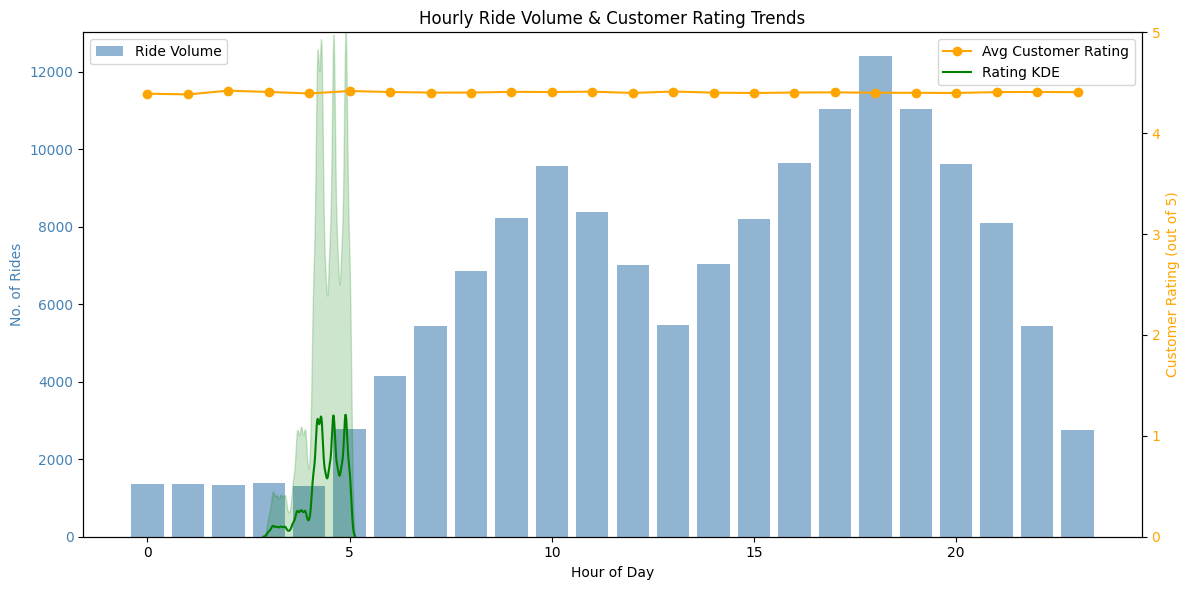

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# Clean Data
# -------------------------------
def clean_and_prepare_data(df):
    df_clean = df.copy()
    df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')
    df_clean['DateTime'] = pd.to_datetime(df_clean['Date'].astype(str) + ' ' + df_clean['Time'].astype(str),
                                          errors='coerce')
    df_clean.dropna(subset=['DateTime'], inplace=True)

    df_clean['Hour'] = df_clean['DateTime'].dt.hour
    df_clean['DayOfWeek'] = df_clean['DateTime'].dt.day_name()
    df_clean['Month'] = df_clean['DateTime'].dt.month
    df_clean['IsWeekend'] = df_clean['DateTime'].dt.weekday >= 5

    # Status
    def categorize_status(status):
        status = str(status).lower()
        if 'completed' in status: return 'Completed'
        if 'cancelled' in status: return 'Cancelled'
        if 'no driver' in status: return 'No Driver Found'
        return 'Other'

    df_clean['Status_Category'] = df_clean['Booking Status'].apply(categorize_status)
    df_clean['Is_Successful'] = df_clean['Status_Category'] == 'Completed'

    # numeric cols
    for col in ['Booking Value','Ride Distance','Driver Ratings','Customer Rating']:
        if col in df_clean.columns:
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

    return df_clean

# -------------------------------
# Analysis & Plotting
# -------------------------------
def comprehensive_ride_analysis(df):
    print("📊 Uber Ride Analysis")
    print("="*40)

    print(f"Total Rides: {len(df)}")
    print(f"✅ Successful: {df['Is_Successful'].sum()} ({df['Is_Successful'].mean()*100:.1f}%)")
    if 'Booking Value' in df.columns:
        print(f"💰 Revenue: ₹{df.loc[df['Is_Successful'],'Booking Value'].sum():,.0f}")

    # -------------------------------
    # Visualization (Single Sheet)
    # -------------------------------
    fig, ax1 = plt.subplots(figsize=(12,6))

    # Ride volume by hour
    hourly_rides = df.groupby('Hour').size()
    ax1.bar(hourly_rides.index, hourly_rides.values, alpha=0.6, color='steelblue', label="Ride Volume")
    ax1.set_xlabel("Hour of Day")
    ax1.set_ylabel("No. of Rides", color='steelblue')
    ax1.tick_params(axis='y', labelcolor='steelblue')

    # Customer rating trend
    ax2 = ax1.twinx()
    hourly_ratings = df.groupby('Hour')['Customer Rating'].mean()
    ax2.plot(hourly_ratings.index, hourly_ratings.values, color='orange', marker='o', label="Avg Customer Rating")
    ax2.set_ylabel("Customer Rating (out of 5)", color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')
    ax2.set_ylim(0,5)

    # KDE distribution safely
    if df['Customer Rating'].notna().sum() > 1:
        kde = sns.kdeplot(data=df, x='Customer Rating', ax=ax2, color='green', label="Rating KDE")
        line = kde.get_lines()[-1]
        kde_y = line.get_ydata()
        kde_x = line.get_xdata()
        kde_y = kde_y * 5 / kde_y.max()  # normalize to 0–5
        ax2.fill_between(kde_x, kde_y, color='green', alpha=0.2)

    # Titles
    ax1.set_title("Hourly Ride Volume & Customer Rating Trends")
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# -------------------------------
# Main
# -------------------------------
def main():
    file_path = "/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv"
    df = pd.read_csv(file_path)
    df_clean = clean_and_prepare_data(df)
    comprehensive_ride_analysis(df_clean)

if __name__=="__main__":
    main()


✅ Data loaded successfully!
🔧 Data cleaning completed! Ready with 150,000 rides

📊 Comprehensive Uber Ride Analysis

🔍 Missing Data Analysis:
                                   Missing Count  Percentage
Incomplete Rides Reason                   141000        94.0
Incomplete Rides                          141000        94.0
Reason for cancelling by Customer         139500        93.0
Cancelled Rides by Customer               139500        93.0
Cancelled Rides by Driver                 123000        82.0
Driver Cancellation Reason                123000        82.0
Customer Rating                            57000        38.0
Driver Ratings                             57000        38.0
Ride Distance                              48000        32.0
Booking Value                              48000        32.0
Payment Method                             48000        32.0
Avg CTAT                                   48000        32.0
Avg VTAT                                   10500         7.0

🎯 E

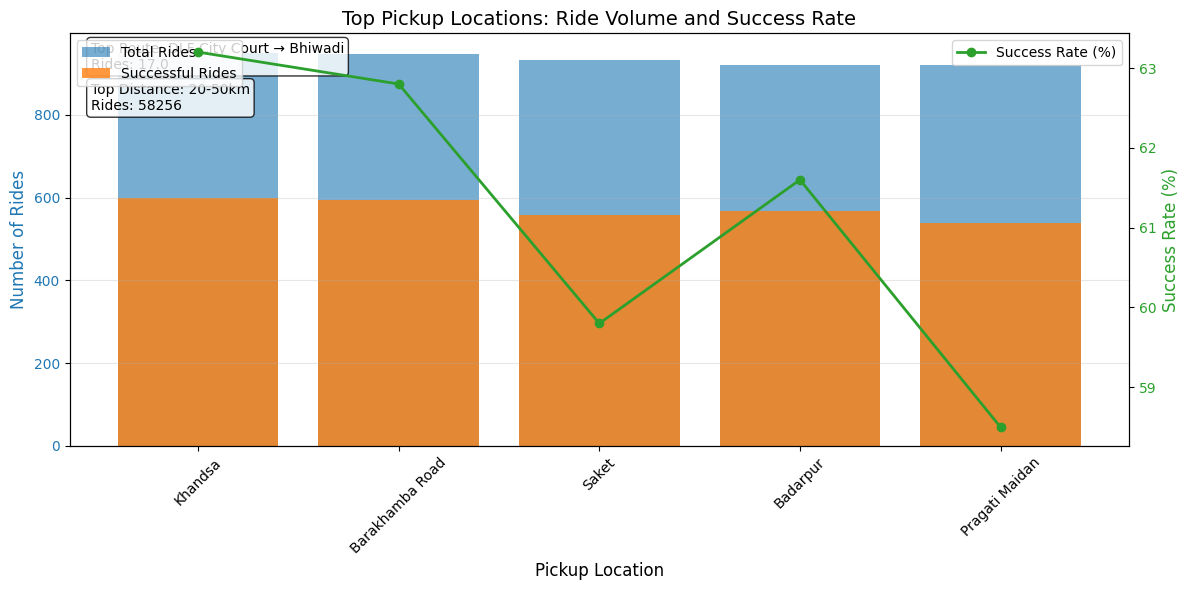

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def clean_and_prepare_data(df):
    """Clean and prepare Uber ride dataset for comprehensive analysis."""
    try:
        df_clean = df.copy()
        required_cols = ['Date', 'Time', 'Booking Status', 'Booking Value', 'Ride Distance', 
                        'Driver Ratings', 'Customer Rating', 'Vehicle Type', 
                        'Cancelled Rides by Customer', 'Cancelled Rides by Driver', 
                        'Customer ID', 'Pickup Location', 'Drop Location']
        missing_cols = [col for col in required_cols if col not in df_clean.columns]
        if missing_cols:
            print(f"⚠️ Warning: Missing columns: {missing_cols}. Proceeding with available columns.")
        
        try:
            df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')
            df_clean['DateTime'] = pd.to_datetime(df_clean['Date'].astype(str) + ' ' + 
                                               df_clean['Time'].astype(str), errors='coerce')
        except Exception as e:
            print(f"❌ Error in date/time conversion: {e}")
            df_clean['DateTime'] = pd.NaT
        
        if 'DateTime' in df_clean.columns:
            df_clean['Hour'] = df_clean['DateTime'].dt.hour
            df_clean['DayOfWeek'] = df_clean['DateTime'].dt.day_name()
            df_clean['Month'] = df_clean['DateTime'].dt.month
            df_clean['IsWeekend'] = df_clean['DateTime'].dt.weekday >= 5
        
        if 'Booking Status' in df_clean.columns:
            def categorize_status(status):
                status = str(status).lower()
                if 'completed' in status:
                    return 'Completed'
                elif 'cancelled' in status:
                    return 'Cancelled'
                elif 'no driver found' in status:
                    return 'No Driver Found'
                else:
                    return 'Other'
            df_clean['Status_Category'] = df_clean['Booking Status'].apply(categorize_status)
            df_clean['Is_Successful'] = df_clean['Booking Status'] == 'Completed'
            df_clean['Is_Cancelled_Customer'] = (df_clean['Cancelled Rides by Customer'].notna() 
                                               if 'Cancelled Rides by Customer' in df_clean.columns else False)
            df_clean['Is_Cancelled_Driver'] = (df_clean['Cancelled Rides by Driver'].notna() 
                                             if 'Cancelled Rides by Driver' in df_clean.columns else False)
        
        for col in ['Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']:
            if col in df_clean.columns:
                df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        
        if 'Pickup Location' in df_clean.columns and 'Drop Location' in df_clean.columns:
            df_clean['Route'] = df_clean['Pickup Location'] + ' → ' + df_clean['Drop Location']
        
        df_clean = df_clean.dropna(subset=['DateTime'])
        return df_clean
    except Exception as e:
        print(f"❌ Fatal error in data cleaning: {e}")
        return None

def load_dataset(file_path):
    """Load dataset from CSV file."""
    try:
        df = pd.read_csv(file_path)
        print("✅ Data loaded successfully!")
        return df
    except Exception as e:
        print(f"❌ Error loading data: {e}")
        return None

def comprehensive_ride_analysis(df):
    """Comprehensive analysis combining all patterns with single-sheet 2D visualization."""
    if df is None or df.empty:
        print("🚫 No data to analyze.")
        return None
    
    print("\n📊 Comprehensive Uber Ride Analysis")
    print("=" * 50)
    
    # Missing Data Analysis
    print("\n🔍 Missing Data Analysis:")
    missing_data = df.isnull().sum()
    missing_percentage = (missing_data / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Count': missing_data,
        'Percentage': missing_percentage
    }).sort_values('Missing Count', ascending=False)
    missing_cols = missing_df[missing_df['Missing Count'] > 0]
    if not missing_cols.empty:
        print(missing_cols)
    else:
        print("🎉 No missing data found!")
    
    # Executive Summary
    metrics = {}
    try:
        metrics['total_rides'] = len(df)
        metrics['successful_rides'] = (df['Is_Successful'].sum() 
                                      if 'Is_Successful' in df.columns else 0)
        metrics['success_rate'] = (metrics['successful_rides'] / metrics['total_rides'] * 100 
                                  if metrics['total_rides'] > 0 else 0)
        metrics['total_revenue'] = (df[df['Is_Successful']]['Booking Value'].sum() 
                                   if 'Booking Value' in df.columns and 'Is_Successful' in df.columns else 0)
        metrics['avg_ride_value'] = (df[df['Is_Successful']]['Booking Value'].mean() 
                                    if 'Booking Value' in df.columns and 'Is_Successful' in df.columns else 0)
        metrics['avg_distance'] = (df[df['Is_Successful']]['Ride Distance'].mean() 
                                  if 'Ride Distance' in df.columns and 'Is_Successful' in df.columns else 0)
        metrics['avg_driver_rating'] = (df[df['Is_Successful']]['Driver Ratings'].mean() 
                                      if 'Driver Ratings' in df.columns and 'Is_Successful' in df.columns else 0)
        metrics['avg_customer_rating'] = (df[df['Is_Successful']]['Customer Rating'].mean() 
                                        if 'Customer Rating' in df.columns and 'Is_Successful' in df.columns else 0)
        metrics['customer_cancellations'] = (df['Is_Cancelled_Customer'].sum() 
                                           if 'Is_Cancelled_Customer' in df.columns else 0)
        metrics['driver_cancellations'] = (df['Is_Cancelled_Driver'].sum() 
                                          if 'Is_Cancelled_Driver' in df.columns else 0)
        
        print("\n🎯 EXECUTIVE SUMMARY")
        print("=" * 50)
        print(f"📊 Total Rides Analyzed: {metrics['total_rides']:,}")
        print(f"✅ Successful Rides: {metrics['successful_rides']:,}")
        print(f"📈 Success Rate: {metrics['success_rate']:.1f}%")
        print(f"💰 Total Revenue: ₹{metrics['total_revenue']:,.0f}" 
              if metrics['total_revenue'] > 0 else "💰 Total Revenue: Not available")
        print(f"💵 Average Ride Value: ₹{metrics['avg_ride_value']:.0f}" 
              if metrics['avg_ride_value'] > 0 else "💵 Average Ride Value: Not available")
        print(f"🛣️ Average Distance: {metrics['avg_distance']:.1f} km" 
              if metrics['avg_distance'] > 0 else "🛣️ Average Distance: Not available")
        print(f"⭐ Avg Driver Rating: {metrics['avg_driver_rating']:.2f}/5" 
              if metrics['avg_driver_rating'] > 0 else "⭐ Avg Driver Rating: Not available")
        print(f"⭐ Avg Customer Rating: {metrics['avg_customer_rating']:.2f}/5" 
              if metrics['avg_customer_rating'] > 0 else "⭐ Avg Customer Rating: Not available")
        print(f"❌ Customer Cancellations: {metrics['customer_cancellations']:,}")
        print(f"🚫 Driver Cancellations: {metrics['driver_cancellations']:,}")
    
    except Exception as e:
        print(f"❌ Error in executive summary: {e}")
    
    # Success Factors Analysis
    success_data = {}
    if 'Vehicle Type' in df.columns and 'Is_Successful' in df.columns:
        vehicle_success = df.groupby('Vehicle Type').agg({
            'Is_Successful': ['count', 'sum', 'mean']
        }).round(3)
        vehicle_success.columns = ['Total_Rides', 'Successful_Rides', 'Success_Rate']
        vehicle_success = vehicle_success.sort_values('Success_Rate', ascending=False)
        print("\n🏆 TOP PERFORMING VEHICLE TYPES:")
        print(vehicle_success.head())
        success_data['vehicle_success'] = vehicle_success
    
    if 'Hour' in df.columns and 'Is_Successful' in df.columns:
        hourly_success = df.groupby('Hour').agg({
            'Is_Successful': ['count', 'sum', 'mean']
        }).round(3)
        hourly_success.columns = ['Total_Rides', 'Successful_Rides', 'Success_Rate']
        print("\n⏰ Success Rate by Hour:")
        print(hourly_success[['Success_Rate']].head())
        success_data['hourly_success'] = hourly_success
    
    if 'DayOfWeek' in df.columns and 'Is_Successful' in df.columns:
        daily_success = df.groupby('DayOfWeek').agg({
            'Is_Successful': ['count', 'sum', 'mean']
        }).round(3)
        daily_success.columns = ['Total_Rides', 'Successful_Rides', 'Success_Rate']
        day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        daily_success = daily_success.reindex(day_order)
        print("\n📅 Success Rate by Day of Week:")
        print(daily_success[['Success_Rate']])
        success_data['daily_success'] = daily_success
    
    if 'Status_Category' in df.columns:
        status_counts = df['Status_Category'].value_counts()
        print("\n🔍 Booking Status Distribution:")
        print(status_counts)
        success_data['status_counts'] = status_counts
    
    # Revenue Patterns Analysis
    revenue_data = {}
    successful_rides = df[df['Is_Successful']].copy() if 'Is_Successful' in df.columns else df.copy()
    if 'Vehicle Type' in df.columns and 'Booking Value' in df.columns:
        vehicle_revenue = successful_rides.groupby('Vehicle Type').agg({
            'Booking Value': ['sum', 'mean', 'count']
        }).round(2)
        vehicle_revenue.columns = ['Total_Revenue', 'Avg_Revenue', 'Ride_Count']
        vehicle_revenue['Revenue_Share'] = (vehicle_revenue['Total_Revenue'] / 
                                         vehicle_revenue['Total_Revenue'].sum() * 100).round(2)
        vehicle_revenue = vehicle_revenue.sort_values('Revenue_Share', ascending=False)
        print("\n🚗 REVENUE BY VEHICLE TYPE:")
        print(vehicle_revenue)
        revenue_data['vehicle_revenue'] = vehicle_revenue
    
    if 'Hour' in df.columns and 'Booking Value' in df.columns:
        hourly_revenue = successful_rides.groupby('Hour')['Booking Value'].mean()
        print("\n⏰ Average Revenue by Hour:")
        print(hourly_revenue.round(2))
        revenue_data['hourly_revenue'] = hourly_revenue
    
    # Time-Based Patterns Analysis
    time_data = {}
    if 'Date' in df.columns:
        daily_rides = df.groupby('Date').size()
        print("\n📅 Daily Ride Volume:")
        print(daily_rides.head())
        time_data['daily_rides'] = daily_rides
    
    if 'Hour' in df.columns:
        hourly_rides = df.groupby('Hour').size()
        print("\n⏰ Rides by Hour of Day:")
        print(hourly_rides)
        print(f"🌅 Peak hour: {hourly_rides.idxmax()}:00 with {hourly_rides.max()} rides")
        print(f"🌙 Quietest hour: {hourly_rides.idxmin()}:00 with {hourly_rides.min()} rides")
        time_data['hourly_rides'] = hourly_rides
    
    if 'IsWeekend' in df.columns and 'Is_Successful' in df.columns:
        weekend_comparison = df.groupby('IsWeekend').agg({
            'Is_Successful': ['count', 'sum', 'mean'],
            'Booking Value': 'mean'
        }).round(3)
        print("\n📈 Weekend vs Weekday Comparison:")
        print(weekend_comparison)
        print(f"📈 Weekend success rate: {weekend_comparison.loc[True, ('Is_Successful', 'mean')]*100:.1f}%")
        print(f"📈 Weekday success rate: {weekend_comparison.loc[False, ('Is_Successful', 'mean')]*100:.1f}%")
        time_data['weekend_comparison'] = weekend_comparison
    
    if 'Month' in df.columns and 'Is_Successful' in df.columns:
        monthly_stats = df.groupby('Month').agg({
            'Is_Successful': ['count', 'mean'],
            'Booking Value': 'mean'
        }).round(3)
        print("\n📅 Monthly Trends:")
        print(monthly_stats)
        time_data['monthly_stats'] = monthly_stats
    
    # Customer Behavior Analysis
    customer_data = {}
    if 'Customer ID' in df.columns:
        customer_stats = df.groupby('Customer ID').agg({
            'Is_Successful': ['count', 'sum', 'mean'],
            'Booking Value': 'sum',
            'Customer Rating': 'mean'
        }).round(3)
        customer_stats.columns = ['Total_Rides', 'Successful_Rides', 'Success_Rate', 'Total_Spent', 'Avg_Rating']
        customer_stats = customer_stats[customer_stats['Total_Rides'] >= 2]
        print(f"\n👥 CUSTOMER BEHAVIOR ANALYSIS:")
        print(f"Total customers: {df['Customer ID'].nunique():,}")
        print(f"Repeat customers (2+ rides): {len(customer_stats):,}")
        print(f"Average rides per customer: {customer_stats['Total_Rides'].mean():.1f}")
        print(f"Top customer rides: {customer_stats['Total_Rides'].max()}")
        
        top_spenders = customer_stats.nlargest(10, 'Total_Spent')
        print(f"\n💰 TOP 10 CUSTOMERS BY SPENDING:")
        print(top_spenders[['Total_Rides', 'Total_Spent', 'Success_Rate']])
        customer_data['customer_stats'] = customer_stats
        customer_data['top_spenders'] = top_spenders
    
    # Geographic & Route Analysis
    geographic_data = {}
    if 'Pickup Location' in df.columns:
        pickup_stats = df.groupby('Pickup Location').agg({
            'Is_Successful': ['count', 'sum', 'mean'],
            'Booking Value': 'mean'
        }).round(3)
        pickup_stats.columns = ['Total_Rides', 'Successful_Rides', 'Success_Rate', 'Avg_Revenue']
        pickup_stats = pickup_stats.sort_values('Total_Rides', ascending=False)
        print("\n🚩 TOP 10 PICKUP LOCATIONS:")
        print(pickup_stats.head(10))
        geographic_data['pickup_stats'] = pickup_stats
    
    if 'Drop Location' in df.columns:
        drop_stats = df.groupby('Drop Location').agg({
            'Is_Successful': ['count', 'sum', 'mean'],
            'Booking Value': 'mean'
        }).round(3)
        drop_stats.columns = ['Total_Rides', 'Successful_Rides', 'Success_Rate', 'Avg_Revenue']
        drop_stats = drop_stats.sort_values('Total_Rides', ascending=False)
        print(f"\n🏁 TOP 10 DROP LOCATIONS:")
        print(drop_stats.head(10))
        geographic_data['drop_stats'] = drop_stats
    
    if 'Route' in df.columns:
        route_stats = df.groupby('Route').agg({
            'Is_Successful': ['count', 'sum', 'mean'],
            'Booking Value': 'mean',
            'Ride Distance': 'mean'
        }).round(3)
        route_stats.columns = ['Total_Rides', 'Successful_Rides', 'Success_Rate', 'Avg_Revenue', 'Avg_Distance']
        route_stats = route_stats.sort_values('Total_Rides', ascending=False)
        print(f"\n🛤️ TOP 10 ROUTES:")
        print(route_stats.head(10))
        geographic_data['route_stats'] = route_stats
    
    if 'Ride Distance' in df.columns and 'Booking Value' in df.columns:
        distance_stats = successful_rides.groupby(pd.cut(successful_rides['Ride Distance'], 
                                                        bins=[0, 5, 10, 20, 50, 100], 
                                                        labels=['0-5km', '5-10km', '10-20km', '20-50km', '50km+'])).agg({
            'Booking Value': ['mean', 'sum', 'count']
        }).round(2)
        distance_stats.columns = ['Avg_Revenue', 'Total_Revenue', 'Ride_Count']
        print(f"\n📏 REVENUE BY DISTANCE CATEGORY:")
        print(distance_stats)
        geographic_data['distance_stats'] = distance_stats
    
    print(f"\n🔍 GEOGRAPHIC INSIGHTS:")
    print(f"📍 Total unique pickup locations: {df['Pickup Location'].nunique()}")
    print(f"🎯 Total unique drop locations: {df['Drop Location'].nunique()}")
    print(f"🛤️ Total unique routes: {df['Route'].nunique()}")
    print(f"🏆 Most popular pickup: {pickup_stats.index[0]} ({pickup_stats.iloc[0]['Total_Rides']} rides)")
    print(f"🏆 Most popular drop: {drop_stats.index[0]} ({drop_stats.iloc[0]['Total_Rides']} rides)")
    print(f"🏆 Most popular route: {route_stats.index[0]} ({route_stats.iloc[0]['Total_Rides']} rides)")
    
    # Single-Sheet Visualization
    if 'Pickup Location' in df.columns and 'Is_Successful' in df.columns:
        print("\n📈 Unique Geographic Visualization")
        fig, ax1 = plt.subplots(figsize=(12, 6))
        
        # Stacked bar for top pickup locations (ride volume and successful rides)
        top_pickups = pickup_stats.head(5)
        ax1.bar(top_pickups.index, top_pickups['Total_Rides'], color='#1f77b4', alpha=0.6, label='Total Rides')
        ax1.bar(top_pickups.index, top_pickups['Successful_Rides'], color='#ff7f0e', alpha=0.8, label='Successful Rides')
        ax1.set_xlabel('Pickup Location', fontsize=12)
        ax1.set_ylabel('Number of Rides', fontsize=12, color='#1f77b4')
        ax1.tick_params(axis='y', labelcolor='#1f77b4')
        ax1.tick_params(axis='x', rotation=45, labelsize=10)
        ax1.grid(True, axis='y', alpha=0.3)
        
        # Secondary axis for success rate
        ax2 = ax1.twinx()
        ax2.plot(top_pickups.index, top_pickups['Success_Rate'] * 100, color='#2ca02c', marker='o', 
                 linewidth=2, label='Success Rate (%)')
        ax2.set_ylabel('Success Rate (%)', fontsize=12, color='#2ca02c')
        ax2.tick_params(axis='y', labelcolor='#2ca02c')
        
        # Annotations for top route and distance
        top_route = route_stats.index[0]
        top_route_rides = route_stats.iloc[0]['Total_Rides']
        ax1.text(0.02, 0.98, f'Top Route: {top_route}\nRides: {top_route_rides}', 
                 transform=ax1.transAxes, fontsize=10, verticalalignment='top', 
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        top_distance = distance_stats['Ride_Count'].idxmax()
        top_distance_rides = distance_stats['Ride_Count'].max()
        ax1.text(0.02, 0.88, f'Top Distance: {top_distance}\nRides: {top_distance_rides}', 
                 transform=ax1.transAxes, fontsize=10, verticalalignment='top', 
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        ax1.set_title('Top Pickup Locations: Ride Volume and Success Rate', fontsize=14)
        ax1.legend(loc='upper left')
        ax2.legend(loc='upper right')
        plt.tight_layout()
        plt.show()
    
    else:
        print("⚠️ Required columns (Pickup Location or Is_Successful) not found for visualization.")
    
    return {
        'metrics': metrics,
        'missing_data': missing_df,
        'success_data': success_data,
        'revenue_data': revenue_data,
        'time_data': time_data,
        'customer_data': customer_data,
        'geographic_data': geographic_data
    }

def main():
    file_path = '/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv'
    df = load_dataset(file_path)
    if df is not None:
        df_clean = clean_and_prepare_data(df)
        if df_clean is not None:
            print(f"🔧 Data cleaning completed! Ready with {len(df_clean):,} rides")
            comprehensive_ride_analysis(df_clean)

if __name__ == "__main__":
    main()

✅ Data loaded!
🔧 Data cleaned! Ready with 150,000 rides

📊 Uber Ride Analysis

🔍 Missing Data:
                                   Missing  Percentage
Avg VTAT                             10500         7.0
Avg CTAT                             48000        32.0
Cancelled Rides by Customer         139500        93.0
Reason for cancelling by Customer   139500        93.0
Cancelled Rides by Driver           123000        82.0
Driver Cancellation Reason          123000        82.0
Incomplete Rides                    141000        94.0
Incomplete Rides Reason             141000        94.0
Booking Value                        48000        32.0
Ride Distance                        48000        32.0
Driver Ratings                       57000        38.0
Customer Rating                      57000        38.0
Payment Method                       48000        32.0

🎯 EXECUTIVE SUMMARY
📊 Total Rides: 150,000
✅ Successful: 93,000 (62.0%)
💰 Revenue: ₹47,260,574
💵 Avg Ride Value: ₹508
🛣️ Avg Distance:

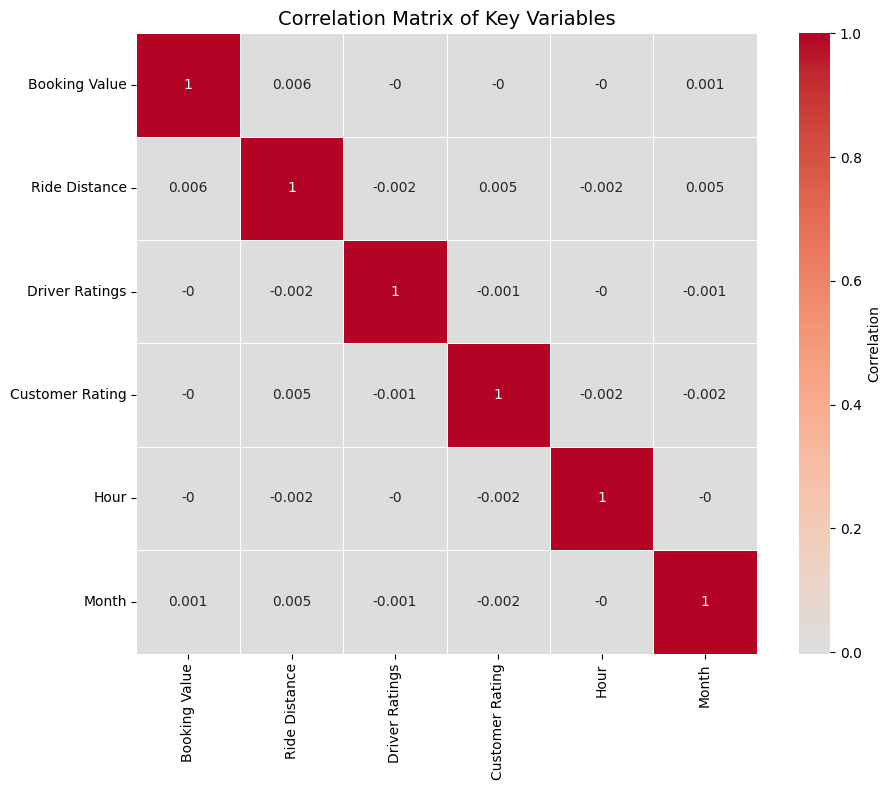

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def clean_and_prepare_data(df):
    """Clean dataset for analysis."""
    try:
        df_clean = df.copy()
        required_cols = ['Date', 'Time', 'Booking Status', 'Booking Value', 'Ride Distance', 
                        'Driver Ratings', 'Customer Rating', 'Vehicle Type', 
                        'Cancelled Rides by Customer', 'Cancelled Rides by Driver', 
                        'Customer ID', 'Pickup Location', 'Drop Location']
        missing_cols = [col for col in required_cols if col not in df_clean.columns]
        if missing_cols:
            print(f"⚠️ Missing columns: {missing_cols}")
        
        df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')
        df_clean['DateTime'] = pd.to_datetime(df_clean['Date'].astype(str) + ' ' + 
                                           df_clean['Time'].astype(str), errors='coerce')
        df_clean['Hour'] = df_clean['DateTime'].dt.hour
        df_clean['DayOfWeek'] = df_clean['DateTime'].dt.day_name()
        df_clean['Month'] = df_clean['DateTime'].dt.month
        df_clean['IsWeekend'] = df_clean['DateTime'].dt.weekday >= 5
        
        if 'Booking Status' in df_clean.columns:
            df_clean['Status_Category'] = df_clean['Booking Status'].apply(
                lambda x: 'Completed' if 'completed' in str(x).lower() else 
                         'Cancelled' if 'cancelled' in str(x).lower() else 
                         'No Driver Found' if 'no driver found' in str(x).lower() else 'Other')
            df_clean['Is_Successful'] = df_clean['Booking Status'] == 'Completed'
            df_clean['Is_Cancelled_Customer'] = df_clean['Cancelled Rides by Customer'].notna() if 'Cancelled Rides by Customer' in df_clean.columns else False
            df_clean['Is_Cancelled_Driver'] = df_clean['Cancelled Rides by Driver'].notna() if 'Cancelled Rides by Driver' in df_clean.columns else False
        
        for col in ['Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']:
            if col in df_clean.columns:
                df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        
        if 'Pickup Location' in df_clean.columns and 'Drop Location' in df_clean.columns:
            df_clean['Route'] = df_clean['Pickup Location'] + ' → ' + df_clean['Drop Location']
        
        df_clean = df_clean.dropna(subset=['DateTime'])
        return df_clean
    except Exception as e:
        print(f"❌ Data cleaning error: {e}")
        return None

def load_dataset(file_path):
    """Load dataset from CSV."""
    try:
        df = pd.read_csv(file_path)
        print("✅ Data loaded!")
        return df
    except Exception as e:
        print(f"❌ Load error: {e}")
        return None

def comprehensive_ride_analysis(df):
    """Comprehensive analysis with single-sheet correlation heatmap."""
    if df is None or df.empty:
        print("🚫 No data to analyze.")
        return None
    
    print("\n📊 Uber Ride Analysis")
    print("=" * 30)
    
    # Missing Data
    print("\n🔍 Missing Data:")
    missing_df = df.isnull().sum()[df.isnull().sum() > 0].to_frame('Missing').join(
        (df.isnull().sum() / len(df) * 100).round(2).to_frame('Percentage'))
    print(missing_df if not missing_df.empty else "🎉 No missing data!")
    
    # Executive Summary
    metrics = {}
    try:
        metrics['total_rides'] = len(df)
        metrics['successful_rides'] = df['Is_Successful'].sum() if 'Is_Successful' in df.columns else 0
        metrics['success_rate'] = metrics['successful_rides'] / metrics['total_rides'] * 100 if metrics['total_rides'] > 0 else 0
        metrics['total_revenue'] = df[df['Is_Successful']]['Booking Value'].sum() if 'Booking Value' in df.columns else 0
        metrics['avg_ride_value'] = df[df['Is_Successful']]['Booking Value'].mean() if 'Booking Value' in df.columns else 0
        metrics['avg_distance'] = df[df['Is_Successful']]['Ride Distance'].mean() if 'Ride Distance' in df.columns else 0
        metrics['avg_driver_rating'] = df[df['Is_Successful']]['Driver Ratings'].mean() if 'Driver Ratings' in df.columns else 0
        metrics['avg_customer_rating'] = df[df['Is_Successful']]['Customer Rating'].mean() if 'Customer Rating' in df.columns else 0
        metrics['customer_cancellations'] = df['Is_Cancelled_Customer'].sum() if 'Is_Cancelled_Customer' in df.columns else 0
        metrics['driver_cancellations'] = df['Is_Cancelled_Driver'].sum() if 'Is_Cancelled_Driver' in df.columns else 0
        
        print("\n🎯 EXECUTIVE SUMMARY")
        print(f"📊 Total Rides: {metrics['total_rides']:,}")
        print(f"✅ Successful: {metrics['successful_rides']:,} ({metrics['success_rate']:.1f}%)")
        print(f"💰 Revenue: ₹{metrics['total_revenue']:,.0f}" if metrics['total_revenue'] > 0 else "💰 Revenue: N/A")
        print(f"💵 Avg Ride Value: ₹{metrics['avg_ride_value']:.0f}" if metrics['avg_ride_value'] > 0 else "💵 Avg Ride Value: N/A")
        print(f"🛣️ Avg Distance: {metrics['avg_distance']:.1f} km" if metrics['avg_distance'] > 0 else "🛣️ Avg Distance: N/A")
        print(f"⭐ Avg Driver Rating: {metrics['avg_driver_rating']:.2f}/5" if metrics['avg_driver_rating'] > 0 else "⭐ Avg Driver Rating: N/A")
        print(f"⭐ Avg Customer Rating: {metrics['avg_customer_rating']:.2f}/5" if metrics['avg_customer_rating'] > 0 else "⭐ Avg Customer Rating: N/A")
        print(f"❌ Customer Cancels: {metrics['customer_cancellations']:,}")
        print(f"🚫 Driver Cancels: {metrics['driver_cancellations']:,}")
    except Exception as e:
        print(f"❌ Summary error: {e}")
    
    # Success Factors
    success_data = {}
    if 'Vehicle Type' in df.columns and 'Is_Successful' in df.columns:
        vehicle_success = df.groupby('Vehicle Type')['Is_Successful'].agg(['count', 'sum', 'mean']).round(3)
        vehicle_success.columns = ['Total_Rides', 'Successful_Rides', 'Success_Rate']
        print("\n🏆 Top Vehicle Types:")
        print(vehicle_success.head())
        success_data['vehicle_success'] = vehicle_success
    
    if 'Hour' in df.columns and 'Is_Successful' in df.columns:
        hourly_success = df.groupby('Hour')['Is_Successful'].agg(['count', 'sum', 'mean']).round(3)
        hourly_success.columns = ['Total_Rides', 'Successful_Rides', 'Success_Rate']
        print("\n⏰ Success by Hour:")
        print(hourly_success[['Success_Rate']].head())
        success_data['hourly_success'] = hourly_success
    
    if 'DayOfWeek' in df.columns and 'Is_Successful' in df.columns:
        daily_success = df.groupby('DayOfWeek')['Is_Successful'].agg(['count', 'sum', 'mean']).round(3)
        daily_success.columns = ['Total_Rides', 'Successful_Rides', 'Success_Rate']
        daily_success = daily_success.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
        print("\n📅 Success by Day:")
        print(daily_success[['Success_Rate']])
        success_data['daily_success'] = daily_success
    
    if 'Status_Category' in df.columns:
        status_counts = df['Status_Category'].value_counts()
        print("\n🔍 Status Distribution:")
        print(status_counts)
        success_data['status_counts'] = status_counts
    
    # Revenue Patterns
    revenue_data = {}
    successful_rides = df[df['Is_Successful']].copy() if 'Is_Successful' in df.columns else df.copy()
    if 'Vehicle Type' in df.columns and 'Booking Value' in df.columns:
        vehicle_revenue = successful_rides.groupby('Vehicle Type')['Booking Value'].agg(['sum', 'mean', 'count']).round(2)
        vehicle_revenue.columns = ['Total_Revenue', 'Avg_Revenue', 'Ride_Count']
        vehicle_revenue['Revenue_Share'] = (vehicle_revenue['Total_Revenue'] / vehicle_revenue['Total_Revenue'].sum() * 100).round(2)
        print("\n🚗 Revenue by Vehicle Type:")
        print(vehicle_revenue)
        revenue_data['vehicle_revenue'] = vehicle_revenue
    
    if 'Hour' in df.columns and 'Booking Value' in df.columns:
        hourly_revenue = successful_rides.groupby('Hour')['Booking Value'].mean().round(2)
        print("\n⏰ Avg Revenue by Hour:")
        print(hourly_revenue)
        revenue_data['hourly_revenue'] = hourly_revenue
    
    # Time-Based Patterns
    time_data = {}
    if 'Date' in df.columns:
        daily_rides = df.groupby('Date').size()
        print("\n📅 Daily Rides:")
        print(daily_rides.head())
        time_data['daily_rides'] = daily_rides
    
    if 'Hour' in df.columns:
        hourly_rides = df.groupby('Hour').size()
        print("\n⏰ Rides by Hour:")
        print(f"🌅 Peak: {hourly_rides.idxmax()}:00 ({hourly_rides.max()} rides)")
        print(f"🌙 Quiet: {hourly_rides.idxmin()}:00 ({hourly_rides.min()} rides)")
        time_data['hourly_rides'] = hourly_rides
    
    if 'IsWeekend' in df.columns and 'Is_Successful' in df.columns:
        weekend_comparison = df.groupby('IsWeekend')['Is_Successful'].agg(['count', 'sum', 'mean']).round(3)
        print("\n📈 Weekend vs Weekday:")
        print(f"📈 Weekend Success: {weekend_comparison.loc[True, 'mean']*100:.1f}%")
        print(f"📈 Weekday Success: {weekend_comparison.loc[False, 'mean']*100:.1f}%")
        time_data['weekend_comparison'] = weekend_comparison
    
    if 'Month' in df.columns and 'Is_Successful' in df.columns:
        monthly_stats = df.groupby('Month')['Is_Successful'].agg(['count', 'mean']).round(3)
        print("\n📅 Monthly Trends:")
        print(monthly_stats)
        time_data['monthly_stats'] = monthly_stats
    
    # Customer Behavior
    customer_data = {}
    if 'Customer ID' in df.columns:
        customer_stats = df.groupby('Customer ID').agg({
            'Is_Successful': ['count', 'sum', 'mean'],
            'Booking Value': 'sum',
            'Customer Rating': 'mean'
        }).round(3)
        customer_stats.columns = ['Total_Rides', 'Successful_Rides', 'Success_Rate', 'Total_Spent', 'Avg_Rating']
        customer_stats = customer_stats[customer_stats['Total_Rides'] >= 2]
        print("\n👥 Customer Insights:")
        print(f"Total Customers: {df['Customer ID'].nunique():,}")
        print(f"Repeat Customers: {len(customer_stats):,}")
        print(f"Avg Rides/Customer: {customer_stats['Total_Rides'].mean():.1f}")
        print(f"Top Customer Rides: {customer_stats['Total_Rides'].max()}")
        print("\n💰 Top 10 Spenders:")
        print(customer_stats.nlargest(10, 'Total_Spent')[['Total_Rides', 'Total_Spent', 'Success_Rate']])
        customer_data['customer_stats'] = customer_stats
    
    # Geographic Patterns
    geographic_data = {}
    if 'Pickup Location' in df.columns:
        pickup_stats = df.groupby('Pickup Location')['Is_Successful'].agg(['count', 'sum', 'mean']).round(3)
        pickup_stats.columns = ['Total_Rides', 'Successful_Rides', 'Success_Rate']
        print("\n🚩 Top 10 Pickup Locations:")
        print(pickup_stats.head(10))
        geographic_data['pickup_stats'] = pickup_stats
    
    if 'Drop Location' in df.columns:
        drop_stats = df.groupby('Drop Location')['Is_Successful'].agg(['count', 'sum', 'mean']).round(3)
        drop_stats.columns = ['Total_Rides', 'Successful_Rides', 'Success_Rate']
        print("\n🏁 Top 10 Drop Locations:")
        print(drop_stats.head(10))
        geographic_data['drop_stats'] = drop_stats
    
    if 'Route' in df.columns:
        route_stats = df.groupby('Route').agg({
            'Is_Successful': ['count', 'sum', 'mean'],
            'Ride Distance': 'mean'
        }).round(3)
        route_stats.columns = ['Total_Rides', 'Successful_Rides', 'Success_Rate', 'Avg_Distance']
        print("\n🛤️ Top 10 Routes:")
        print(route_stats.head(10))
        geographic_data['route_stats'] = route_stats
    
    if 'Ride Distance' in df.columns:
        distance_stats = successful_rides.groupby(pd.cut(successful_rides['Ride Distance'], 
                                                        bins=[0, 5, 10, 20, 50, 100], 
                                                        labels=['0-5km', '5-10km', '10-20km', '20-50km', '50km+']))['Booking Value'].agg(['count', 'mean']).round(2)
        distance_stats.columns = ['Ride_Count', 'Avg_Revenue']
        print("\n📏 Distance Categories:")
        print(distance_stats)
        geographic_data['distance_stats'] = distance_stats
    
    # Correlation Analysis
    correlation_data = {}
    if all(col in df.columns for col in ['Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating', 'Hour', 'Month']):
        numeric_df = df[['Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating', 'Hour', 'Month']].dropna()
        correlation_matrix = numeric_df.corr().round(3)
        print("\n🔗 CORRELATION ANALYSIS")
        significant_corrs = []
        for i in range(len(correlation_matrix.columns)):
            for j in range(i+1, len(correlation_matrix.columns)):
                corr_value = correlation_matrix.iloc[i, j]
                if abs(corr_value) > 0.3:
                    significant_corrs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_value))
        significant_corrs.sort(key=lambda x: abs(x[2]), reverse=True)
        
        print("\n🔍 Significant Correlations (|r| > 0.3):")
        for var1, var2, corr in significant_corrs:
            print(f"{var1} ↔ {var2}: {corr:.3f}")
        correlation_data['correlation_matrix'] = correlation_matrix
        
        # Enhanced Heatmap
        print("\n📈 Correlation Heatmap")
        fig, ax = plt.subplots(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5, cbar_kws={'label': 'Correlation'})
        
        # Highlight significant correlations
        for i in range(len(correlation_matrix)):
            for j in range(i+1, len(correlation_matrix)):
                if abs(correlation_matrix.iloc[i, j]) > 0.3:
                    ax.text(j + 0.5, i + 0.5, f'{correlation_matrix.iloc[i, j]:.2f}', 
                            ha='center', va='center', color='black', fontsize=10, bbox=dict(facecolor='yellow', alpha=0.5))
        
        # Add text box for top correlation
        if significant_corrs:
            top_corr = significant_corrs[0]
            ax.text(0.02, 0.98, f'Top Correlation: {top_corr[0]} ↔ {top_corr[1]}: {top_corr[2]:.3f}', 
                    transform=ax.transAxes, fontsize=10, verticalalignment='top', 
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        ax.set_title('Correlation Matrix of Key Variables', fontsize=14)
        plt.tight_layout()
        plt.show()
    
    else:
        print("⚠️ Required columns for correlation not found.")
    
    return {
        'metrics': metrics,
        'missing_data': missing_df,
        'success_data': success_data,
        'revenue_data': revenue_data,
        'time_data': time_data,
        'customer_data': customer_data,
        'geographic_data': geographic_data,
        'correlation_data': correlation_data
    }

def main():
    file_path = '/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv'
    df = load_dataset(file_path)
    if df is not None:
        df_clean = clean_and_prepare_data(df)
        if df_clean is not None:
            print(f"🔧 Data cleaned! Ready with {len(df_clean):,} rides")
            comprehensive_ride_analysis(df_clean)

if __name__ == "__main__":
    main()

In [12]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode

# Initialize Plotly
init_notebook_mode(connected=True)

def clean_and_prepare_data(df):
    """Clean dataset for analysis."""
    try:
        df_clean = df.copy()
        required_cols = ['Date', 'Time', 'Booking Status', 'Booking Value', 'Ride Distance', 
                        'Driver Ratings', 'Customer Rating', 'Vehicle Type', 
                        'Cancelled Rides by Customer', 'Cancelled Rides by Driver', 
                        'Customer ID', 'Pickup Location', 'Drop Location']
        missing_cols = [col for col in required_cols if col not in df_clean.columns]
        if missing_cols:
            print(f"⚠️ Missing columns: {missing_cols}")
        
        df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')
        df_clean['DateTime'] = pd.to_datetime(df_clean['Date'].astype(str) + ' ' + 
                                           df_clean['Time'].astype(str), errors='coerce')
        df_clean['Hour'] = df_clean['DateTime'].dt.hour
        df_clean['DayOfWeek'] = df_clean['DateTime'].dt.day_name()
        df_clean['Month'] = df_clean['DateTime'].dt.month
        df_clean['IsWeekend'] = df_clean['DateTime'].dt.weekday >= 5
        
        if 'Booking Status' in df_clean.columns:
            df_clean['Status_Category'] = df_clean['Booking Status'].apply(
                lambda x: 'Completed' if 'completed' in str(x).lower() else 
                         'Cancelled' if 'cancelled' in str(x).lower() else 
                         'No Driver Found' if 'no driver found' in str(x).lower() else 'Other')
            df_clean['Is_Successful'] = df_clean['Booking Status'] == 'Completed'
            df_clean['Is_Cancelled_Customer'] = df_clean['Cancelled Rides by Customer'].notna() if 'Cancelled Rides by Customer' in df_clean.columns else False
            df_clean['Is_Cancelled_Driver'] = df_clean['Cancelled Rides by Driver'].notna() if 'Cancelled Rides by Driver' in df_clean.columns else False
        
        for col in ['Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']:
            if col in df_clean.columns:
                df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        
        if 'Pickup Location' in df_clean.columns and 'Drop Location' in df_clean.columns:
            df_clean['Route'] = df_clean['Pickup Location'] + ' → ' + df_clean['Drop Location']
        
        df_clean = df_clean.dropna(subset=['DateTime'])
        return df_clean
    except Exception as e:
        print(f"❌ Data cleaning error: {e}")
        return None

def load_dataset(file_path):
    """Load dataset from CSV."""
    try:
        df = pd.read_csv(file_path)
        print("✅ Data loaded!")
        return df
    except Exception as e:
        print(f"❌ Load error: {e}")
        return None

def comprehensive_ride_analysis(df):
    """Comprehensive analysis with single-sheet interactive Plotly visualization."""
    if df is None or df.empty:
        print("🚫 No data to analyze.")
        return None
    
    print("\n📊 Uber Ride Analysis")
    print("=" * 30)
    
    # Missing Data
    print("\n🔍 Missing Data:")
    missing_df = df.isnull().sum()[df.isnull().sum() > 0].to_frame('Missing').join(
        (df.isnull().sum() / len(df) * 100).round(2).to_frame('Percentage'))
    print(missing_df if not missing_df.empty else "🎉 No missing data!")
    
    # Executive Summary
    metrics = {}
    try:
        metrics['total_rides'] = len(df)
        metrics['successful_rides'] = df['Is_Successful'].sum() if 'Is_Successful' in df.columns else 0
        metrics['success_rate'] = metrics['successful_rides'] / metrics['total_rides'] * 100 if metrics['total_rides'] > 0 else 0
        metrics['total_revenue'] = df[df['Is_Successful']]['Booking Value'].sum() if 'Booking Value' in df.columns else 0
        metrics['avg_ride_value'] = df[df['Is_Successful']]['Booking Value'].mean() if 'Booking Value' in df.columns else 0
        metrics['avg_distance'] = df[df['Is_Successful']]['Ride Distance'].mean() if 'Ride Distance' in df.columns else 0
        metrics['avg_driver_rating'] = df[df['Is_Successful']]['Driver Ratings'].mean() if 'Driver Ratings' in df.columns else 0
        metrics['avg_customer_rating'] = df[df['Is_Successful']]['Customer Rating'].mean() if 'Customer Rating' in df.columns else 0
        metrics['customer_cancellations'] = df['Is_Cancelled_Customer'].sum() if 'Is_Cancelled_Customer' in df.columns else 0
        metrics['driver_cancellations'] = df['Is_Cancelled_Driver'].sum() if 'Is_Cancelled_Driver' in df.columns else 0
        
        print("\n🎯 EXECUTIVE SUMMARY")
        print(f"📊 Total Rides: {metrics['total_rides']:,}")
        print(f"✅ Successful: {metrics['successful_rides']:,} ({metrics['success_rate']:.1f}%)")
        print(f"💰 Revenue: ₹{metrics['total_revenue']:,.0f}" if metrics['total_revenue'] > 0 else "💰 Revenue: N/A")
        print(f"💵 Avg Ride Value: ₹{metrics['avg_ride_value']:.0f}" if metrics['avg_ride_value'] > 0 else "💵 Avg Ride Value: N/A")
        print(f"🛣️ Avg Distance: {metrics['avg_distance']:.1f} km" if metrics['avg_distance'] > 0 else "🛣️ Avg Distance: N/A")
        print(f"⭐ Avg Driver Rating: {metrics['avg_driver_rating']:.2f}/5" if metrics['avg_driver_rating'] > 0 else "⭐ Avg Driver Rating: N/A")
        print(f"⭐ Avg Customer Rating: {metrics['avg_customer_rating']:.2f}/5" if metrics['avg_customer_rating'] > 0 else "⭐ Avg Customer Rating: N/A")
        print(f"❌ Customer Cancels: {metrics['customer_cancellations']:,}")
        print(f"🚫 Driver Cancels: {metrics['driver_cancellations']:,}")
    except Exception as e:
        print(f"❌ Summary error: {e}")
    
    # Success Factors
    success_data = {}
    if 'Vehicle Type' in df.columns and 'Is_Successful' in df.columns:
        vehicle_success = df.groupby('Vehicle Type')['Is_Successful'].agg(['count', 'sum', 'mean']).round(3)
        vehicle_success.columns = ['Total_Rides', 'Successful_Rides', 'Success_Rate']
        print("\n🏆 Top Vehicle Types:")
        print(vehicle_success.head())
        success_data['vehicle_success'] = vehicle_success
    
    if 'Hour' in df.columns and 'Is_Successful' in df.columns:
        hourly_success = df.groupby('Hour')['Is_Successful'].agg(['count', 'sum', 'mean']).round(3)
        hourly_success.columns = ['Total_Rides', 'Successful_Rides', 'Success_Rate']
        print("\n⏰ Success by Hour:")
        print(hourly_success[['Success_Rate']].head())
        success_data['hourly_success'] = hourly_success
    
    if 'DayOfWeek' in df.columns and 'Is_Successful' in df.columns:
        daily_success = df.groupby('DayOfWeek')['Is_Successful'].agg(['count', 'sum', 'mean']).round(3)
        daily_success.columns = ['Total_Rides', 'Successful_Rides', 'Success_Rate']
        daily_success = daily_success.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
        print("\n📅 Success by Day:")
        print(daily_success[['Success_Rate']])
        success_data['daily_success'] = daily_success
    
    if 'Status_Category' in df.columns:
        status_counts = df['Status_Category'].value_counts()
        print("\n🔍 Status Distribution:")
        print(status_counts)
        success_data['status_counts'] = status_counts
    
    # Revenue Patterns
    revenue_data = {}
    successful_rides = df[df['Is_Successful']].copy() if 'Is_Successful' in df.columns else df.copy()
    if 'Vehicle Type' in df.columns and 'Booking Value' in df.columns:
        vehicle_revenue = successful_rides.groupby('Vehicle Type')['Booking Value'].agg(['sum', 'mean', 'count']).round(2)
        vehicle_revenue.columns = ['Total_Revenue', 'Avg_Revenue', 'Ride_Count']
        vehicle_revenue['Revenue_Share'] = (vehicle_revenue['Total_Revenue'] / vehicle_revenue['Total_Revenue'].sum() * 100).round(2)
        print("\n🚗 Revenue by Vehicle Type:")
        print(vehicle_revenue)
        revenue_data['vehicle_revenue'] = vehicle_revenue
    
    if 'Hour' in df.columns and 'Booking Value' in df.columns:
        hourly_revenue = successful_rides.groupby('Hour')['Booking Value'].mean().round(2)
        print("\n⏰ Avg Revenue by Hour:")
        print(hourly_revenue)
        revenue_data['hourly_revenue'] = hourly_revenue
    
    # Time-Based Patterns
    time_data = {}
    if 'Date' in df.columns:
        daily_rides = df.groupby('Date').size()
        print("\n📅 Daily Rides:")
        print(daily_rides.head())
        time_data['daily_rides'] = daily_rides
    
    if 'Hour' in df.columns:
        hourly_rides = df.groupby('Hour').size()
        print("\n⏰ Rides by Hour:")
        print(f"🌅 Peak: {hourly_rides.idxmax()}:00 ({hourly_rides.max()} rides)")
        print(f"🌙 Quiet: {hourly_rides.idxmin()}:00 ({hourly_rides.min()} rides)")
        time_data['hourly_rides'] = hourly_rides
    
    if 'IsWeekend' in df.columns and 'Is_Successful' in df.columns:
        weekend_comparison = df.groupby('IsWeekend')['Is_Successful'].agg(['count', 'sum', 'mean']).round(3)
        print("\n📈 Weekend vs Weekday:")
        print(f"📈 Weekend Success: {weekend_comparison.loc[True, 'mean']*100:.1f}%")
        print(f"📈 Weekday Success: {weekend_comparison.loc[False, 'mean']*100:.1f}%")
        time_data['weekend_comparison'] = weekend_comparison
    
    if 'Month' in df.columns and 'Is_Successful' in df.columns:
        monthly_stats = df.groupby('Month')['Is_Successful'].agg(['count', 'mean']).round(3)
        print("\n📅 Monthly Trends:")
        print(monthly_stats)
        time_data['monthly_stats'] = monthly_stats
    
    # Customer Behavior
    customer_data = {}
    if 'Customer ID' in df.columns:
        customer_stats = df.groupby('Customer ID').agg({
            'Is_Successful': ['count', 'sum', 'mean'],
            'Booking Value': 'sum',
            'Customer Rating': 'mean'
        }).round(3)
        customer_stats.columns = ['Total_Rides', 'Successful_Rides', 'Success_Rate', 'Total_Spent', 'Avg_Rating']
        customer_stats = customer_stats[customer_stats['Total_Rides'] >= 2]
        print("\n👥 Customer Insights:")
        print(f"Total Customers: {df['Customer ID'].nunique():,}")
        print(f"Repeat Customers: {len(customer_stats):,}")
        print(f"Avg Rides/Customer: {customer_stats['Total_Rides'].mean():.1f}")
        print(f"Top Customer Rides: {customer_stats['Total_Rides'].max()}")
        print("\n💰 Top 10 Spenders:")
        print(customer_stats.nlargest(10, 'Total_Spent')[['Total_Rides', 'Total_Spent', 'Success_Rate']])
        customer_data['customer_stats'] = customer_stats
    
    # Geographic Patterns
    geographic_data = {}
    if 'Pickup Location' in df.columns:
        pickup_stats = df.groupby('Pickup Location')['Is_Successful'].agg(['count', 'sum', 'mean']).round(3)
        pickup_stats.columns = ['Total_Rides', 'Successful_Rides', 'Success_Rate']
        print("\n🚩 Top 10 Pickup Locations:")
        print(pickup_stats.head(10))
        geographic_data['pickup_stats'] = pickup_stats
    
    if 'Drop Location' in df.columns:
        drop_stats = df.groupby('Drop Location')['Is_Successful'].agg(['count', 'sum', 'mean']).round(3)
        drop_stats.columns = ['Total_Rides', 'Successful_Rides', 'Success_Rate']
        print("\n🏁 Top 10 Drop Locations:")
        print(drop_stats.head(10))
        geographic_data['drop_stats'] = drop_stats
    
    if 'Route' in df.columns:
        route_stats = df.groupby('Route').agg({
            'Is_Successful': ['count', 'sum', 'mean'],
            'Ride Distance': 'mean'
        }).round(3)
        route_stats.columns = ['Total_Rides', 'Successful_Rides', 'Success_Rate', 'Avg_Distance']
        print("\n🛤️ Top 10 Routes:")
        print(route_stats.head(10))
        geographic_data['route_stats'] = route_stats
    
    if 'Ride Distance' in df.columns:
        distance_stats = successful_rides.groupby(pd.cut(successful_rides['Ride Distance'], 
                                                        bins=[0, 5, 10, 20, 50, 100], 
                                                        labels=['0-5km', '5-10km', '10-20km', '20-50km', '50km+']))['Booking Value'].agg(['count', 'mean']).round(2)
        distance_stats.columns = ['Ride_Count', 'Avg_Revenue']
        print("\n📏 Distance Categories:")
        print(distance_stats)
        geographic_data['distance_stats'] = distance_stats
    
    # Correlation Analysis
    correlation_data = {}
    if all(col in df.columns for col in ['Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating', 'Hour', 'Month']):
        numeric_df = df[['Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating', 'Hour', 'Month']].dropna()
        correlation_matrix = numeric_df.corr().round(3)
        print("\n🔗 CORRELATION ANALYSIS")
        significant_corrs = []
        for i in range(len(correlation_matrix.columns)):
            for j in range(i+1, len(correlation_matrix.columns)):
                corr_value = correlation_matrix.iloc[i, j]
                if abs(corr_value) > 0.3:
                    significant_corrs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_value))
        significant_corrs.sort(key=lambda x: abs(x[2]), reverse=True)
        
        print("\n🔍 Significant Correlations (|r| > 0.3):")
        for var1, var2, corr in significant_corrs:
            print(f"{var1} ↔ {var2}: {corr:.3f}")
        correlation_data['correlation_matrix'] = correlation_matrix
    
    # Interactive Visualization
    if all(col in df.columns for col in ['Vehicle Type', 'Is_Successful', 'Hour', 'Booking Value', 'Ride Distance']):
        print("\n📈 Interactive Dashboard")
        fig = make_subplots(rows=2, cols=1, 
                            subplot_titles=("Success Rate by Vehicle Type", "Hourly Trends & Revenue vs Distance"),
                            specs=[[{"type": "bar"}], [{"type": "xy", "secondary_y": True}]],
                            vertical_spacing=0.15)
        
        # Bar plot: Success rate by vehicle type
        vehicle_success = df.groupby('Vehicle Type')['Is_Successful'].agg(['count', 'sum', 'mean']).round(3)
        vehicle_success.columns = ['Total_Rides', 'Successful_Rides', 'Success_Rate']
        fig.add_trace(go.Bar(x=vehicle_success.index, y=vehicle_success['Success_Rate']*100, 
                             name='Success Rate (%)', marker_color='#1f77b4', 
                             hovertemplate='%{x}<br>Success Rate: %{y:.1f}%<br>Total Rides: %{customdata[0]}',
                             customdata=vehicle_success[['Total_Rides']].values), 
                      row=1, col=1)
        
        # Hourly trends: Ride volume and success rate
        hourly_data = df.groupby('Hour').agg({'Is_Successful': ['count', 'mean'], 'Booking Value': 'mean'}).round(3)
        hourly_data.columns = ['Total_Rides', 'Success_Rate', 'Avg_Revenue']
        fig.add_trace(go.Scatter(x=hourly_data.index, y=hourly_data['Total_Rides'], 
                                 name='Total Rides', mode='lines+markers', line=dict(color='#ff7f0e'),
                                 hovertemplate='Hour: %{x}<br>Rides: %{y}'), 
                      row=2, col=1)
        fig.add_trace(go.Scatter(x=hourly_data.index, y=hourly_data['Success_Rate']*100, 
                                 name='Success Rate (%)', mode='lines+markers', line=dict(color='#2ca02c'),
                                 hovertemplate='Hour: %{x}<br>Success Rate: %{y:.1f}%'), 
                      row=2, col=1, secondary_y=True)
        
        # Scatter: Revenue vs Distance
        sample_data = successful_rides.sample(n=min(5000, len(successful_rides)))
        for vehicle in sample_data['Vehicle Type'].unique()[:3]:  # Limit to top 3 vehicle types
            vehicle_data = sample_data[sample_data['Vehicle Type'] == vehicle]
            fig.add_trace(go.Scatter(x=vehicle_data['Ride Distance'], y=vehicle_data['Booking Value'], 
                                     mode='markers', name=f'{vehicle} Revenue', 
                                     marker=dict(size=vehicle_data['Driver Ratings']*2, opacity=0.6),
                                     hovertemplate='Distance: %{x:.1f} km<br>Revenue: ₹%{y:.0f}<br>Driver Rating: %{marker.size:.1f}'),
                          row=2, col=1)
        
        # Update layout with dropdowns
        fig.update_layout(
            title="Uber Ride Analytics Dashboard",
            height=800, showlegend=True,
            updatemenus=[
                dict(
                    buttons=[
                        dict(label="Show All", method="update", 
                             args=[{"visible": [True]*len(fig.data)}, {"title": "Uber Ride Analytics Dashboard"}]),
                        dict(label="Vehicle Success", method="update", 
                             args=[{"visible": [True] + [False]*(len(fig.data)-1)}, {"title": "Success Rate by Vehicle Type"}]),
                        dict(label="Hourly Trends", method="update", 
                             args=[{"visible": [False] + [True, True] + [False]*(len(fig.data)-3)}, {"title": "Hourly Ride Volume & Success Rate"}]),
                        dict(label="Revenue vs Distance", method="update", 
                             args=[{"visible": [False]*3 + [True]*(len(fig.data)-3)}, {"title": "Revenue vs Distance by Vehicle Type"}])
                    ],
                    direction="down", showactive=True, x=0.1, xanchor="left", y=1.15, yanchor="top"
                )
            ]
        )
        fig.update_xaxes(title_text="Vehicle Type", row=1, col=1)
        fig.update_xaxes(title_text="Hour / Distance (km)", row=2, col=1)
        fig.update_yaxes(title_text="Success Rate (%)", row=1, col=1)
        fig.update_yaxes(title_text="Total Rides", row=2, col=1)
        fig.update_yaxes(title_text="Success Rate (%)", row=2, col=1, secondary_y=True)
        
        fig.show(renderer='iframe')
        print("📊 Interactive visualizations created!")
        print("💡 Tip: Use dropdown to switch views, click legend to toggle, hover for details")
    
    else:
        print("⚠️ Required columns for visualization not found.")
    
    return {
        'metrics': metrics,
        'success_data': success_data,
        'revenue_data': revenue_data,
        'time_data': time_data,
        'customer_data': customer_data,
        'geographic_data': geographic_data,
        'correlation_data': correlation_data
    }

def main():
    file_path = '/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv'
    df = load_dataset(file_path)
    if df is not None:
        df_clean = clean_and_prepare_data(df)
        if df_clean is not None:
            print(f"🔧 Data cleaned! Ready with {len(df_clean):,} rides")
            comprehensive_ride_analysis(df_clean)

if __name__ == "__main__":
    main()

✅ Data loaded!
🔧 Data cleaned! Ready with 150,000 rides

📊 Uber Ride Analysis

🔍 Missing Data:
                                   Missing  Percentage
Avg VTAT                             10500         7.0
Avg CTAT                             48000        32.0
Cancelled Rides by Customer         139500        93.0
Reason for cancelling by Customer   139500        93.0
Cancelled Rides by Driver           123000        82.0
Driver Cancellation Reason          123000        82.0
Incomplete Rides                    141000        94.0
Incomplete Rides Reason             141000        94.0
Booking Value                        48000        32.0
Ride Distance                        48000        32.0
Driver Ratings                       57000        38.0
Customer Rating                      57000        38.0
Payment Method                       48000        32.0

🎯 EXECUTIVE SUMMARY
📊 Total Rides: 150,000
✅ Successful: 93,000 (62.0%)
💰 Revenue: ₹47,260,574
💵 Avg Ride Value: ₹508
🛣️ Avg Distance:

📊 Interactive visualizations created!
💡 Tip: Use dropdown to switch views, click legend to toggle, hover for details
